# Mini Project 2

**2025 Introduction to Quantitative Methods in Finance**

**The Erdös Institute**


###  Hypothesis Testing of Standard Assumptions Theoretical Financial Mathematics

In the theory of mathematical finance, it is common to assume the log returns of a stock/index are normally distributed.


Investigate if the log returns of stocks or indexes of your choosing are normally distributed. Some suggestions for exploration include:

    1) Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.
    
    2) Test if removing extremal return data creates a distribution with evidence of being normal.
    
    3) Create a personalized portfolio of stocks with historical log return data that is normally distributed.
    
    4) Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.
    
    5) Gather x-number of historical stock data and just perform a normality test on their log return data to see if any of the stocks exhibit evidence of log returns that are normally distributed.

# <span style="color:blue;"> Introduction </span> #

We examine several stocks and indices to see if the log-returns have evidence of normal distributions. We analyze several sets of data:
1. Common Indices
2. Portfolio from Mini-Project 1: High-Risk Profile
3. Portfolio from Mini-Project 1: Low-Risk Profile

In [1]:
# Import packages
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import pandas as pd
import scipy.stats as stats

# <span style="color:blue;"> 1. Common Indices </span> #

We examine several indices listed in Yahoo Finance's World Indices list (https://finance.yahoo.com/markets/world-indices/). The indices we consider are
- Dow Jones Industrial Average,
- NASDAQ Composite,
- NYSE Composite Index,
- NYSE American Composite Index,
- Cboe UK 100, and
- Russell 2000.

In [216]:
# Two years of data
start_date = dt.datetime.today() - dt.timedelta(days = 2*365)
end_date = dt.datetime.today()

# Symbols
symbols = ['^DJI', '^IXIC', '^NYA', '^XAX', '^BUK100P', '^RUT']

# Number of symbols
n_symbols = len(symbols)

# Download the data
stocks = yf.download(symbols, start = start_date, end = end_date)
returns = stocks['Close']/stocks['Close'].shift(1)
df = np.log(returns.dropna())
logreturns = df.values

[*********************100%***********************]  6 of 6 completed


We create probability plots to visually assess the normality.

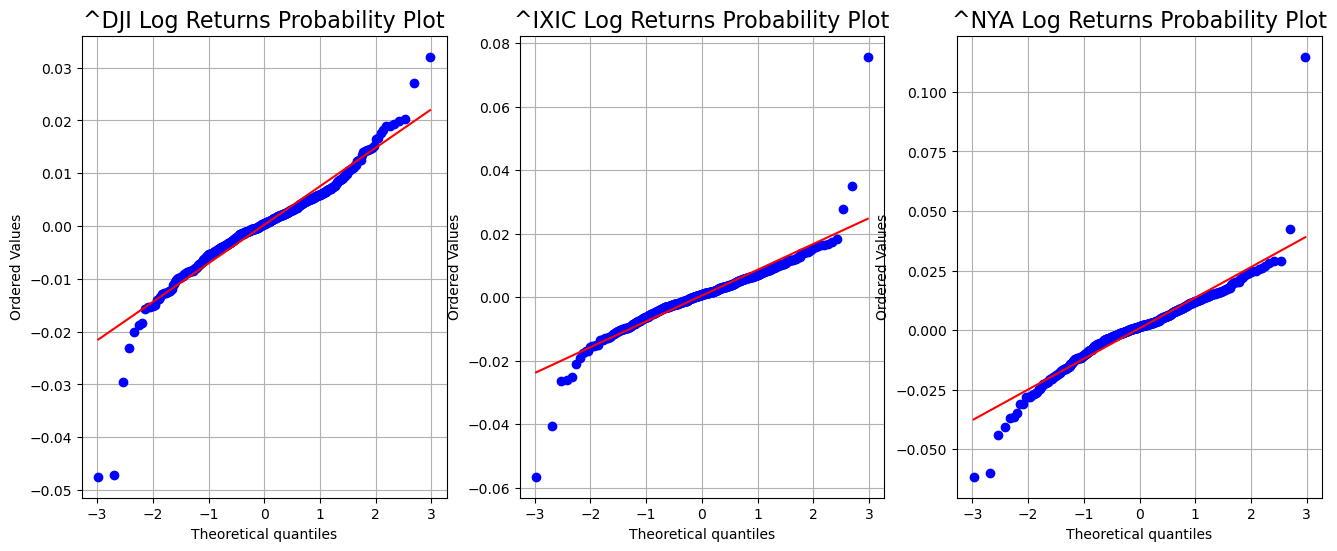

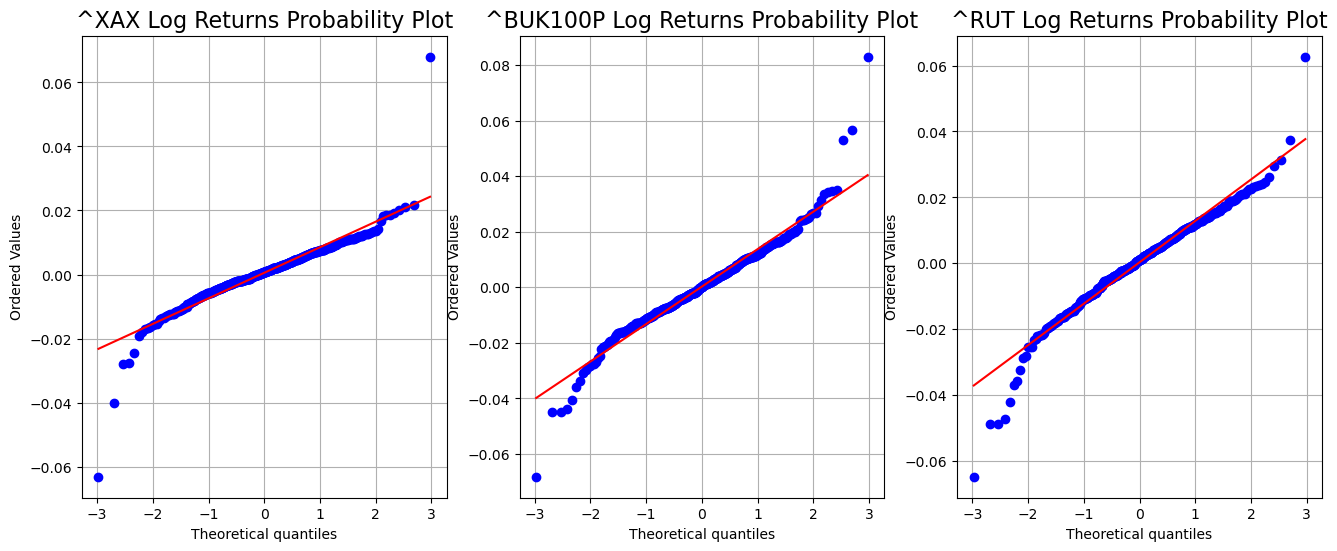

In [217]:
for j in range(2):
    # Create 1x3 grid of subplots
    fig, axes = plt.subplots(1, 3, figsize=(16, 6))
    
    for i in range(3):
        stats.probplot(logreturns[:, i+3*j], dist="norm", plot=axes[i])
        axes[i].set_title(f"{symbols[i+3*j]} Log Returns Probability Plot", fontsize=16)
        axes[i].grid(True)

plt.show()

Our plots above suggest that for each index, the log returns are not normal. This is articulated in the plots through the blue dots not being near the red lines. In all of the above plots, as we approach 3 theoretical quantiles away from the mean, the blue dots tend further from the red lines, and thus the distributions tend further from normal distibutions.

We further assess the normality using p-values.

In [78]:
# Collect p-values of normality tests
p_sp = np.zeros(n_symbols)
for i in range(n_symbols):
    p_sp[i] = stats.normaltest(logreturns[:, i])[1]

# Print evidence/non-evidence of normality
for i in range(n_symbols):
    print(f"{symbols[i]} log return distribution: p-value = {p_sp[i]:.4f}")
    if p_sp[i] < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
        print("→ No statistically significant evidence against normality.")

^DJI log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
^IXIC log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
^NYA log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
^XAX log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
^BUK100P log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
^RUT log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.


Using a 0.05 significance level, our above p-values reveal that there is statistically significant evidence that none of the indices have normally distributed log returns.

## Outliers ##

Based on the probability plots, we notice there are outliers in the log returns. We examine how removing these outliers affects the distributions.

In [218]:
# Omit outliers
new_df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
new_logreturns = new_df.values

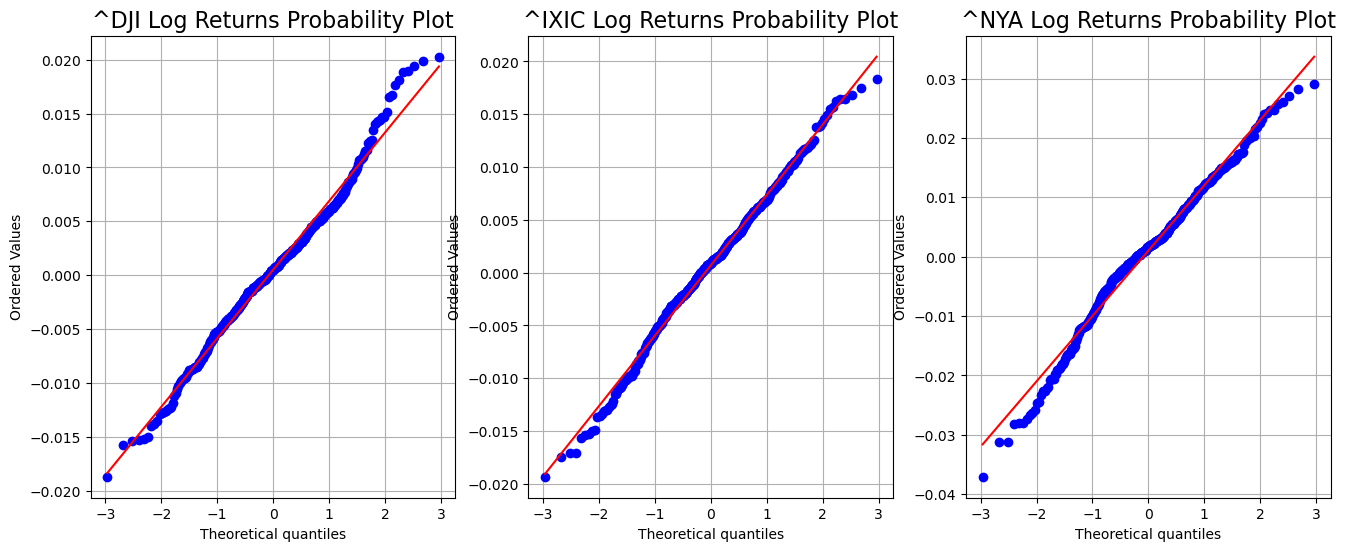

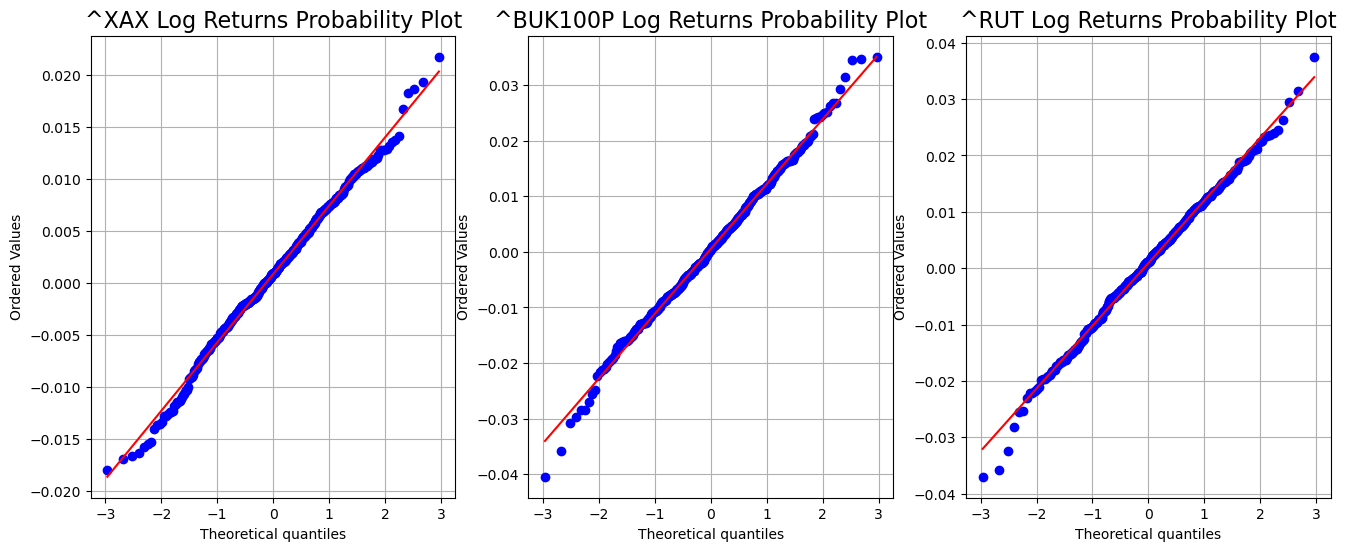

In [219]:
for j in range(2):
    # Create 1x3 grid of subplots
    fig, axes = plt.subplots(1, 3, figsize=(16, 6))
    
    for i in range(3):
        stats.probplot(new_logreturns[:, i+3*j], dist="norm", plot=axes[i])
        axes[i].set_title(f"{symbols[i+3*j]} Log Returns Probability Plot", fontsize=16)
        axes[i].grid(True)

plt.show()

In general, the above probability plots give evidence that the distibutions without outliers are closer to being normal distributions than the distributions with outliers. The evidence is illustrated through the blue dots in the above plots being closer to the red lines than the blue dots in the previous set of plots. We assess the evidence against normality using p-values.

In [81]:
# Collect p-values of normality tests
new_p_sp = np.zeros(n_symbols)
for i in range(n_symbols):
    new_p_sp[i] = stats.normaltest(new_logreturns[:, i])[1]

# Print evidence/non-evidence of normality
for i in range(n_symbols):
    print(f"{symbols[i]} log return distribution without outliers: p-value = {new_p_sp[i]:.4f}")
    if new_p_sp[i] < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
        print("→ No statistically significant evidence against normality.")

^DJI log return distribution without outliers: p-value = 0.0196
→ Statistically significant evidence that the data is NOT normally distributed.
^IXIC log return distribution without outliers: p-value = 0.3536
→ No statistically significant evidence against normality.
^NYA log return distribution without outliers: p-value = 0.0008
→ Statistically significant evidence that the data is NOT normally distributed.
^XAX log return distribution without outliers: p-value = 0.4749
→ No statistically significant evidence against normality.
^BUK100P log return distribution without outliers: p-value = 0.2770
→ No statistically significant evidence against normality.
^RUT log return distribution without outliers: p-value = 0.1936
→ No statistically significant evidence against normality.


The above p-values reflect a test for normality on the log returns of the data without outliers. Using a 0.05 significance level, the above p-values suggest that there is statistical evidence that the log returns of the DJI and NYA indices are not normally distributed. There is not statistical significant evidence against normality for the IXIC, XAX, BUK100P, and RUT indices.

# <span style="color:blue;"> 2. Portfolio from Mini-Project 1: High-Risk Profile </span> #

Our high-risk profile portfolio from Mini-Project 1 has the following stocks and weights:
- AMD: Weight = 0.1414,
- ASML: Weight = 0.0976,
- AVGO: Weight = 0.1972,
- NOW: Weight = 0.0562,
- NVDA: Weight = 0.1427,
- PLTR: Weight = 0.0558,
- QCOM: Weight = 0.0845,
- TSM: Weight = 0.0681,
- TXN: Weight = 0.1019, and
- UBER: Weight = 0.0544.

# Stocks #

We first examine each of the above 10 stocks individually to assess normality of the log returns.

In [221]:
# Set the dates to be 2023 and 2024
start_date = dt.date(2023, 1, 1)
end_date = dt.date(2024, 12, 31)

# Set the tickers
tickers = ['AMD', 'ASML', 'AVGO', 'NOW', 'NVDA', 'PLTR', 'QCOM', 'TSM', 'TXN', 'UBER']

# Number of assets
n_assets = len(tickers)

# Download the data
stocks = yf.download(tickers, start=start_date, end=end_date)
returns = stocks['Close']/stocks['Close'].shift(1)
df = np.log(returns.dropna())
logreturns = df.values

# Number of dates for which there is stock data, after removing N/A's
n_data = np.size(df, 0)

[*********************100%***********************]  10 of 10 completed


We create probability plots to visually assess the normality.

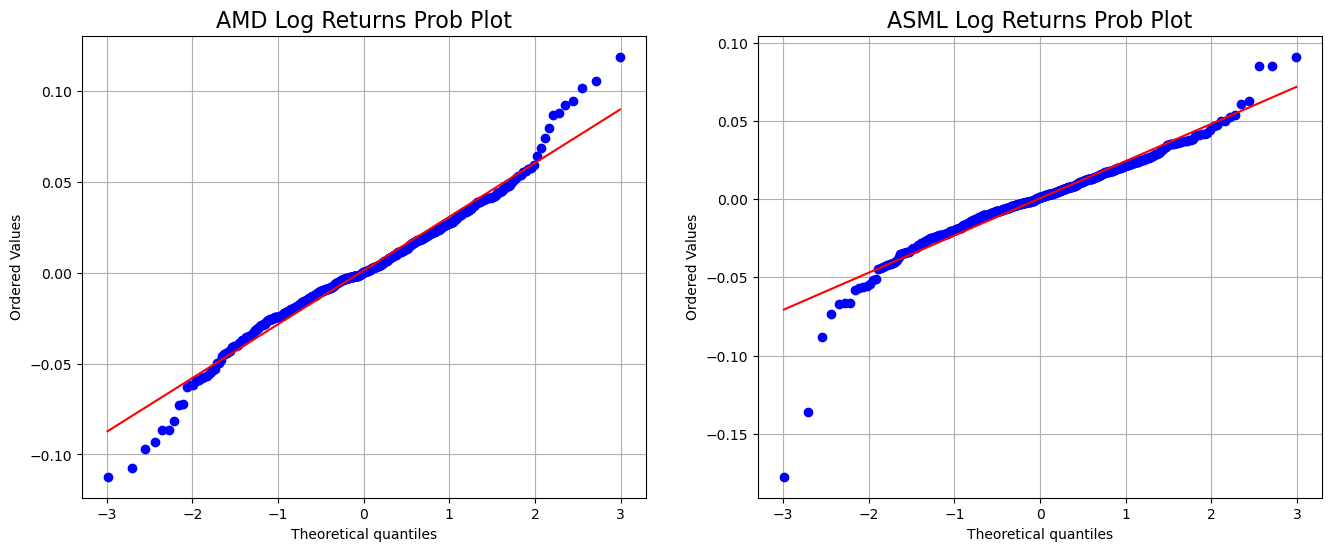

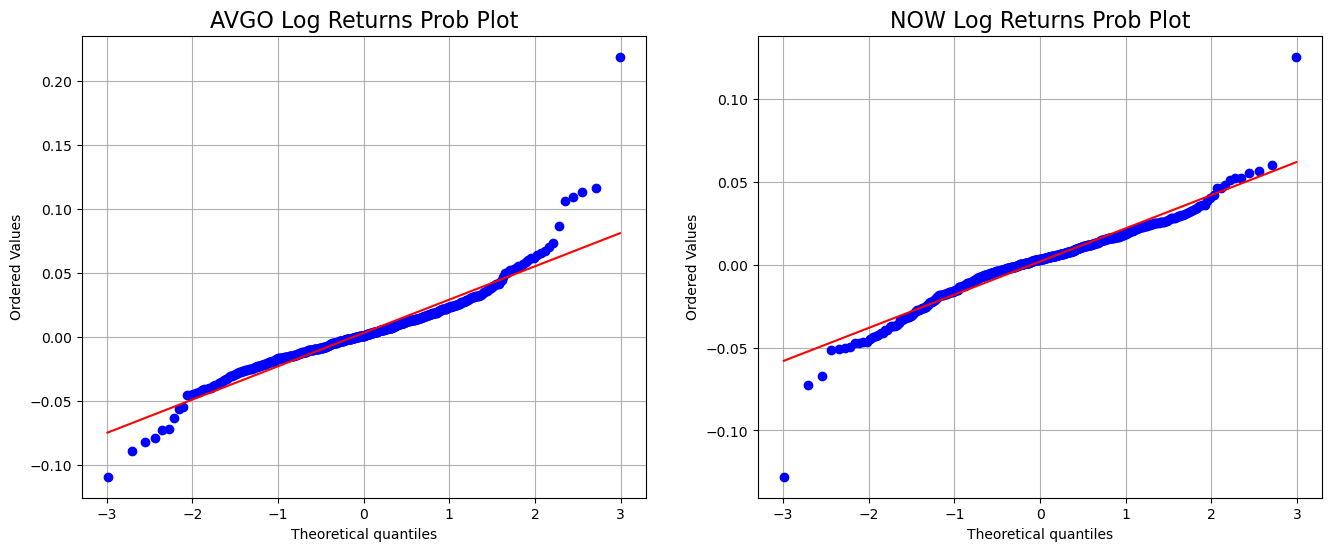

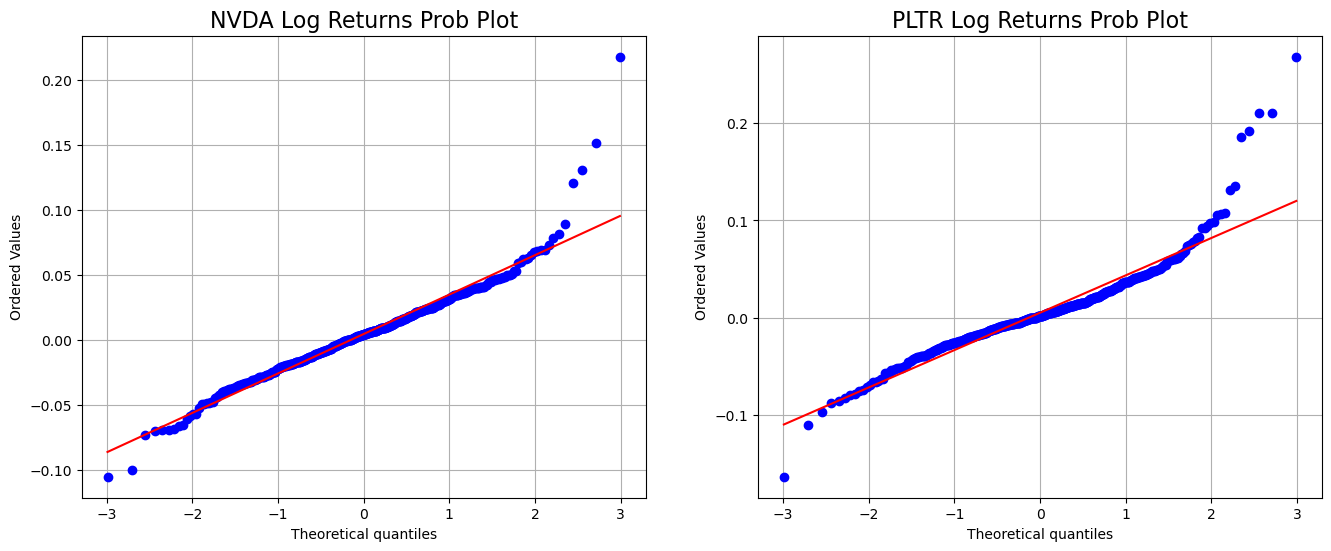

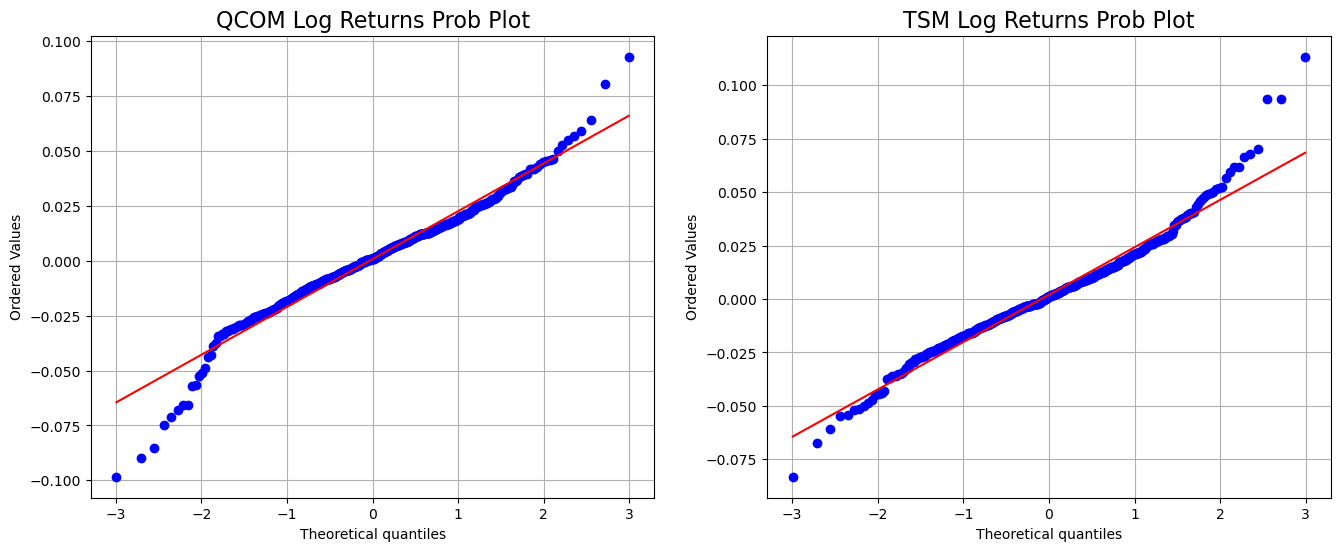

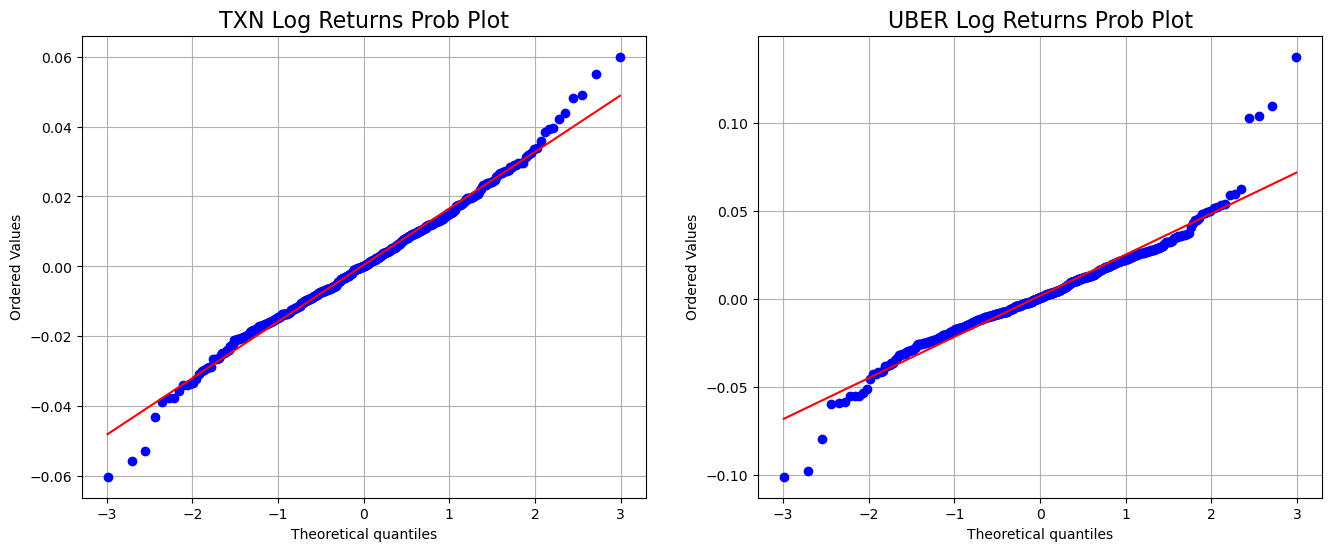

In [222]:
for j in range(5):
    # Create 1x2 grid of subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    for i in range(2):
        stats.probplot(logreturns[:, i+2*j], dist="norm", plot=axes[i])
        axes[i].set_title(f"{tickers[i+2*j]} Log Returns Prob Plot", fontsize=16)
        axes[i].grid(True)

plt.show()

From the above plots, the blue dots appear far from the red lines, especially as we approach 3 theoretical quantiles away from the mean. These plots suggest that the log returns are not normally distributed. We assess the evidence against normality using p-values.

In [223]:
# Collect p-values of normality tests
p_vals = np.zeros(n_assets)
for i in range(n_assets):
    p_vals[i] = stats.normaltest(logreturns[:, i])[1]

# Print evidence/non-evidence of normality
for i in range(n_assets):
    print(f"{tickers[i]} log return distribution without outliers: p-value = {p_vals[i]:.4f}")
    if p_vals[i] < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
        print("→ No statistically significant evidence against normality.")

AMD log return distribution without outliers: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
ASML log return distribution without outliers: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
AVGO log return distribution without outliers: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
NOW log return distribution without outliers: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
NVDA log return distribution without outliers: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
PLTR log return distribution without outliers: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
QCOM log return distribution without outliers: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distrib

There is statistically significant evidence that none of the above distributions of log returns are normally distributed.

## Time Intervals and Outliers ##

We examine whether choosing a different time frame could affect the normality of the log returns.

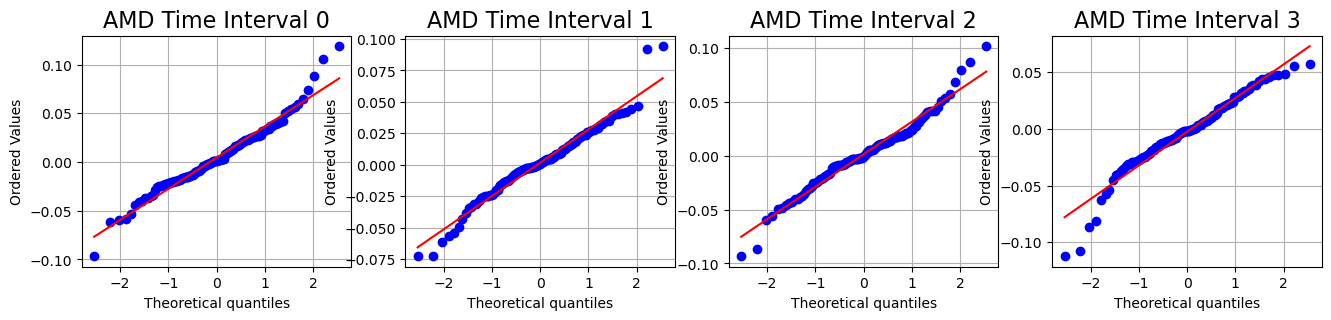

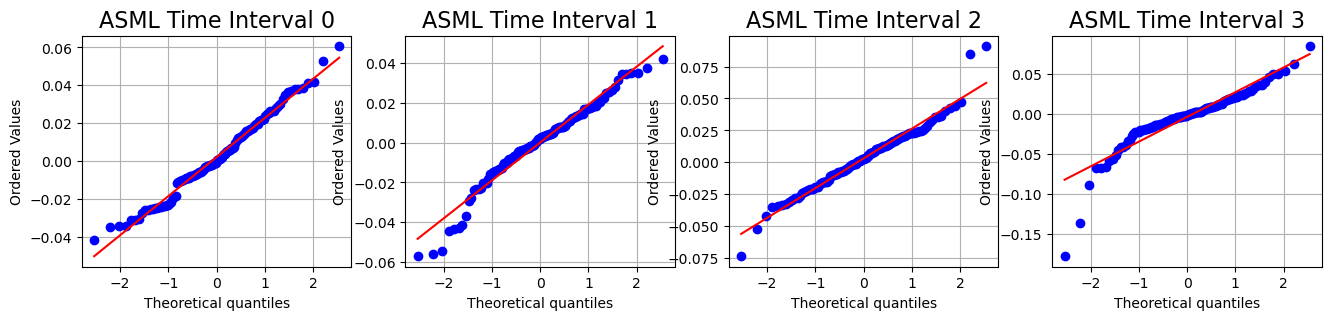

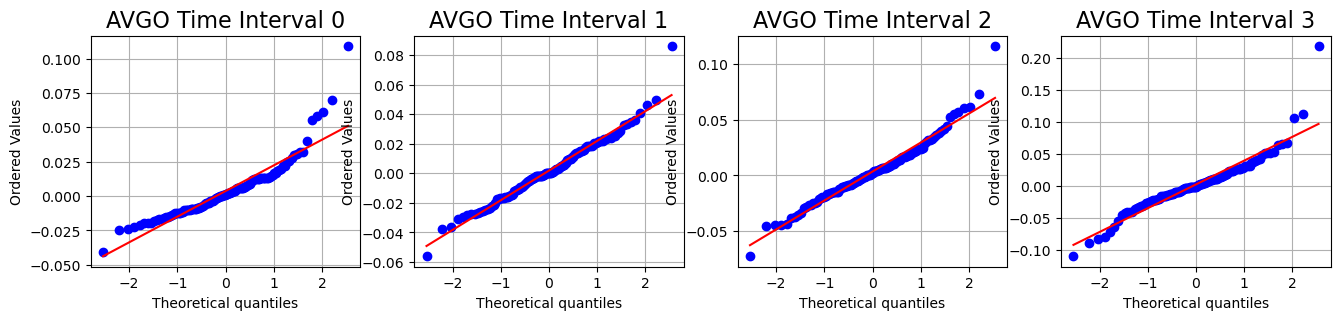

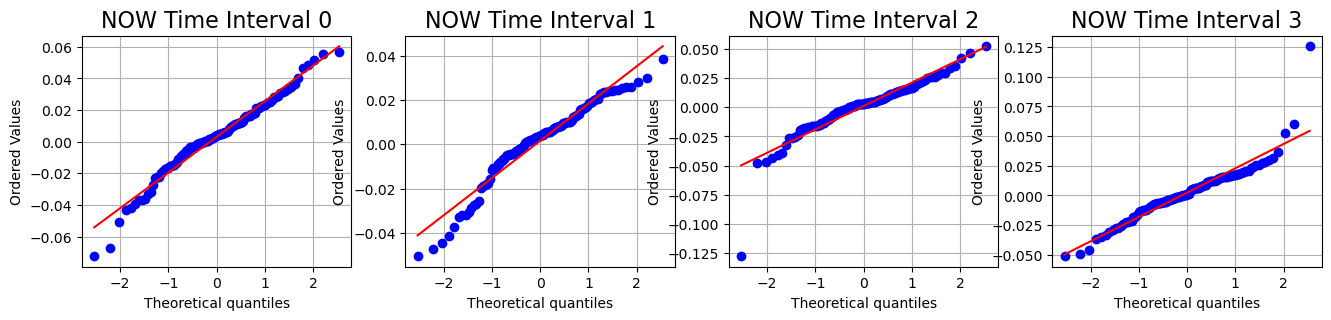

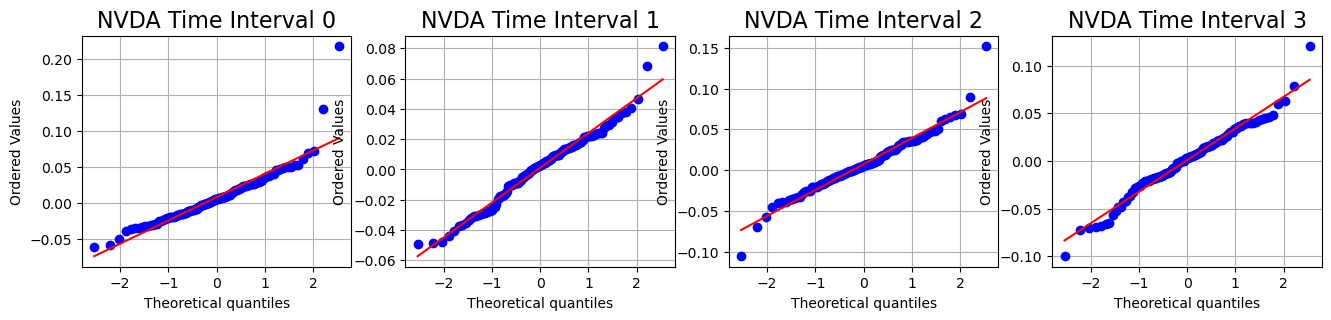

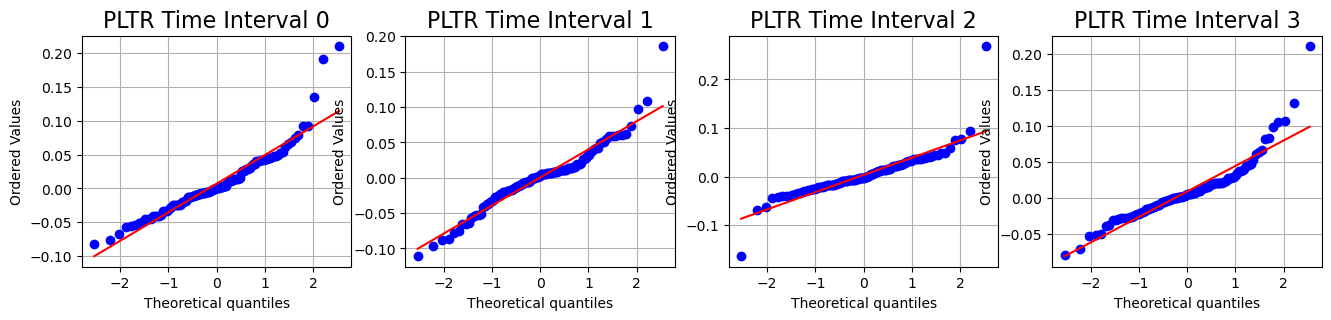

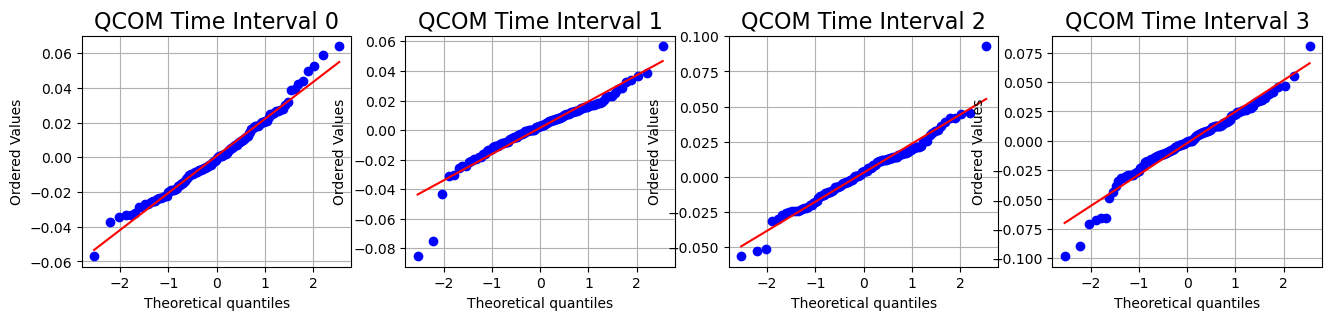

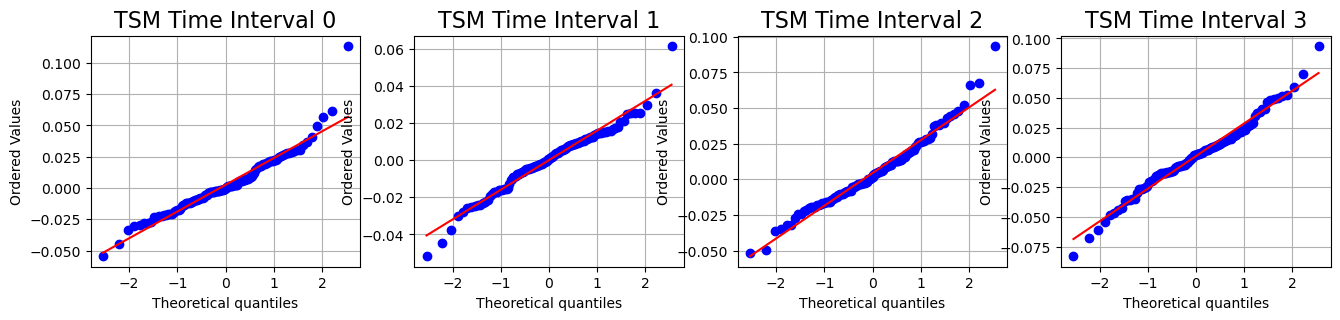

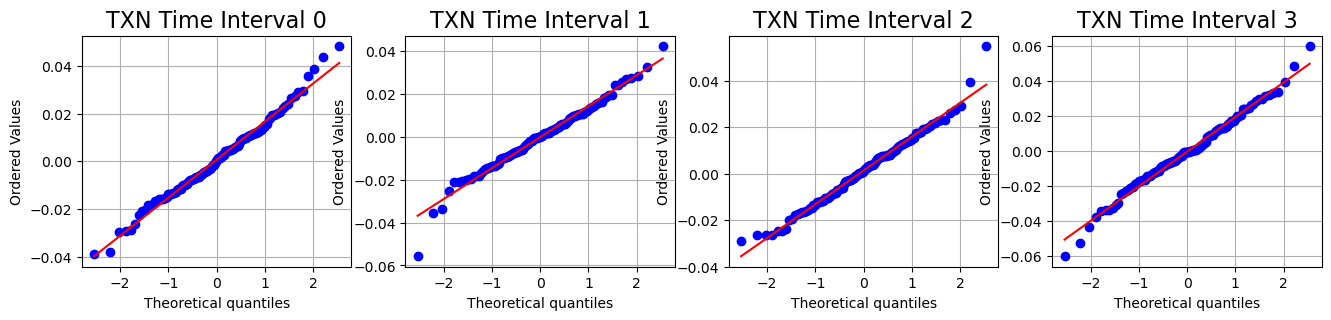

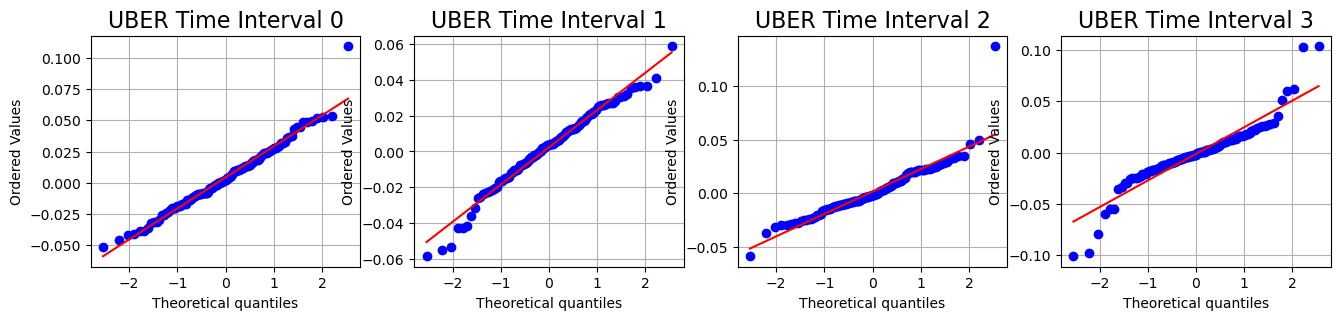

In [87]:
# Number of time frames
n_cut = 4
# Number of dates in each time frame
n_data_cut = int(np.floor(n_data/n_cut))

# Form the probability plots
for j in range(n_assets):
    # Create 1xn_cut grid of subplots
    fig, axes = plt.subplots(1, n_cut, figsize=(16, 3))
    
    for i in range(n_cut):
        stats.probplot(logreturns[i*n_data_cut:(i+1)*n_data_cut, j], dist="norm", plot=axes[i])
        axes[i].set_title(f"{tickers[j]} Time Interval {i}", fontsize=16)
        axes[i].grid(True)

plt.show()

For each time frame, we now omit the outliers.

In [97]:
# Create a list of data frames
list_df = [df[i*n_data_cut:(i+1)*n_data_cut] for i in range(n_cut)]

# Omit outliers
new_df = [list_df[i][(np.abs(stats.zscore(list_df[i])) < 3).all(axis=1)] for i in range(n_cut)]
new_logreturns = [new_df[i].values for i in range(n_cut)]

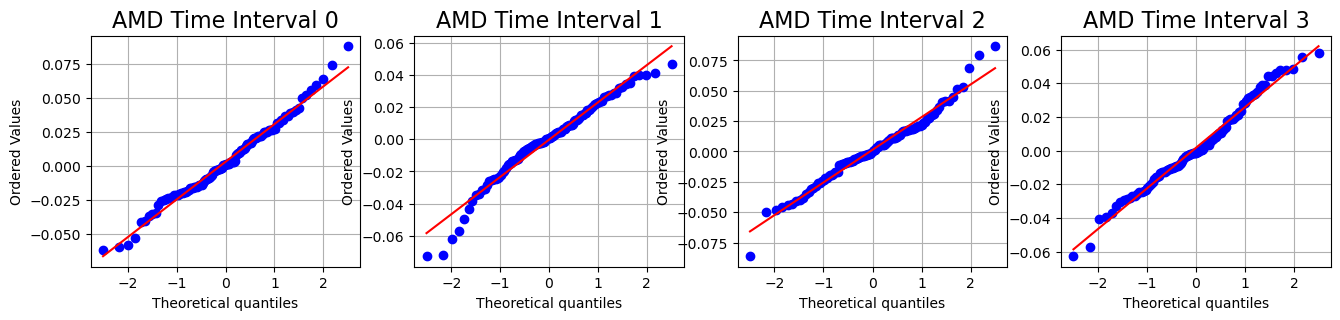

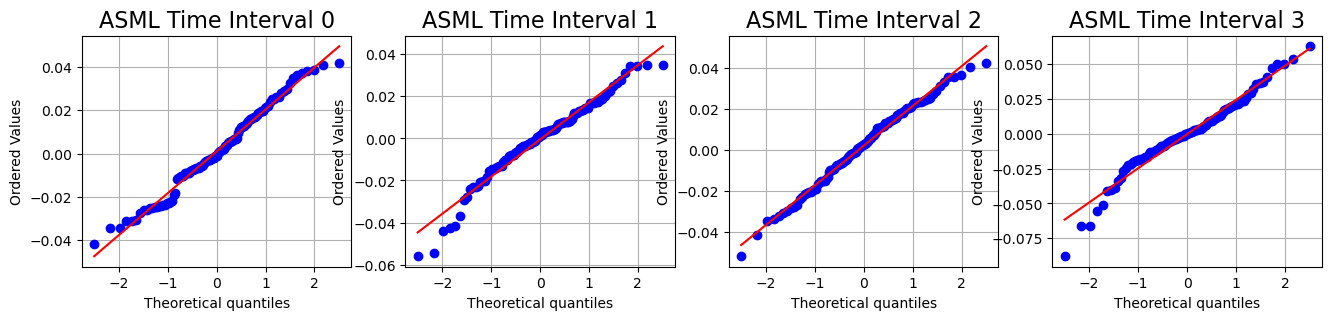

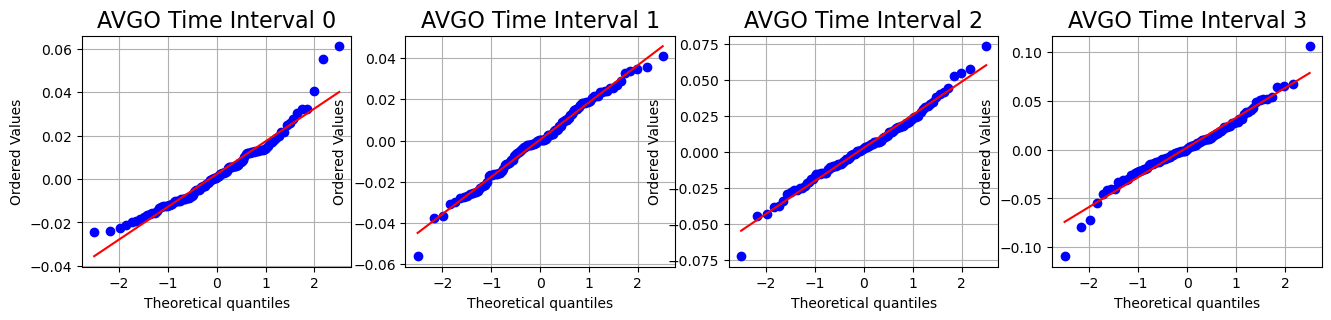

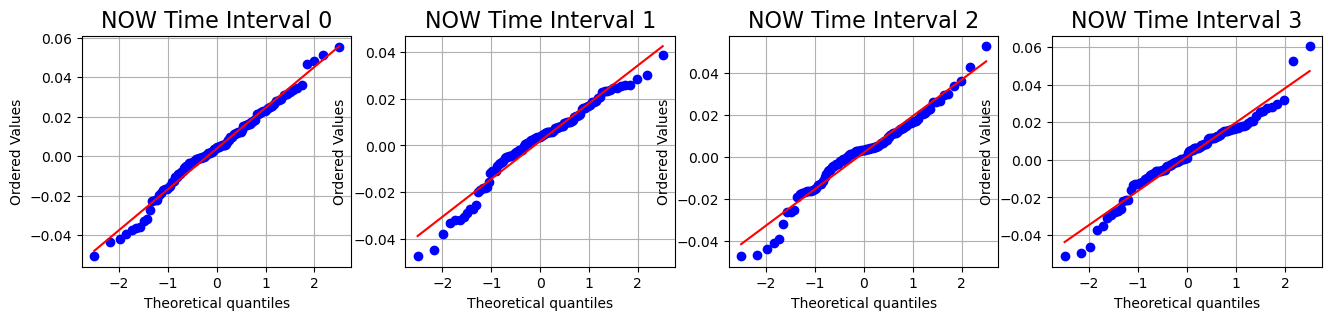

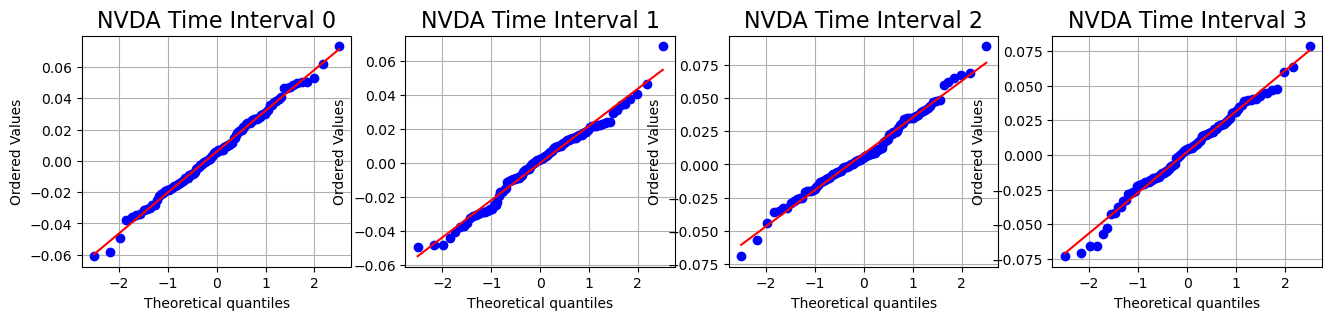

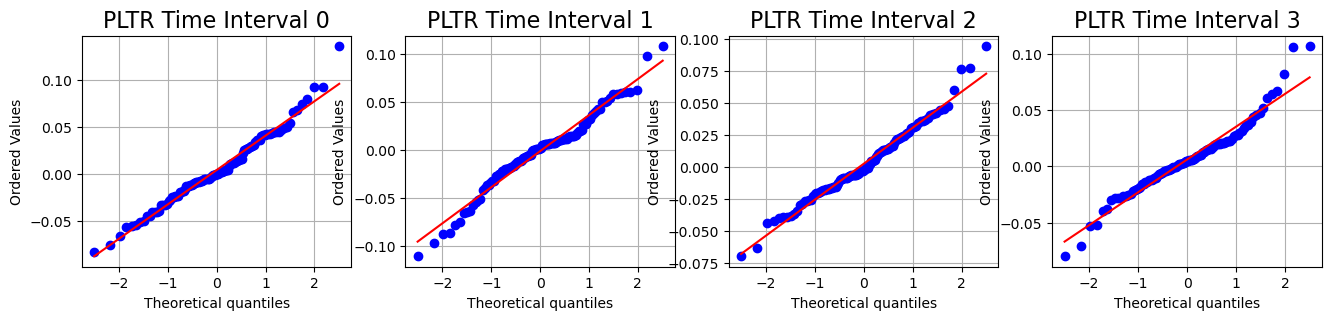

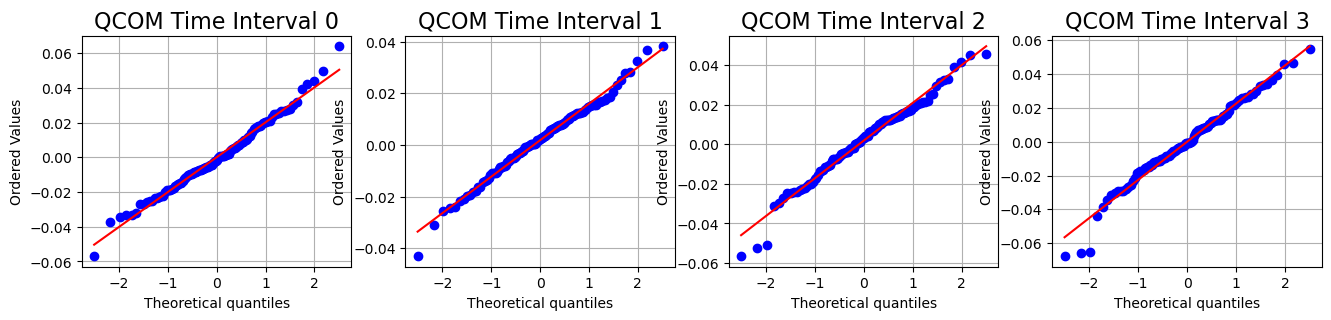

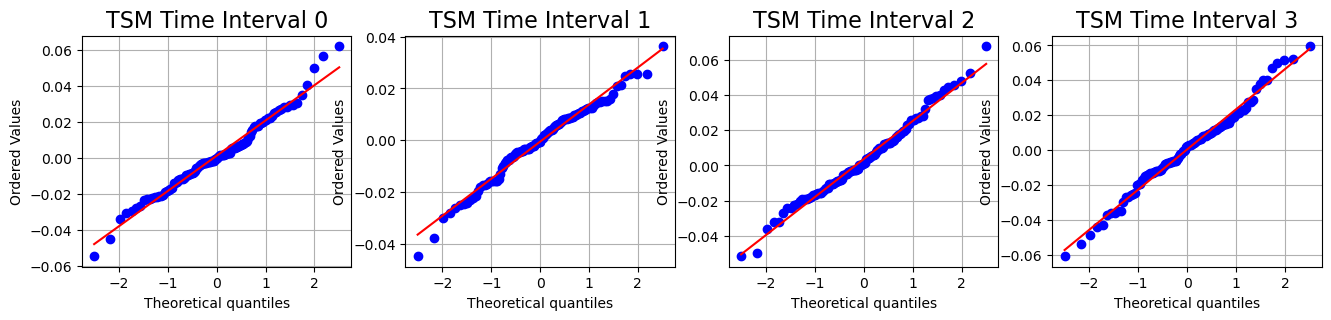

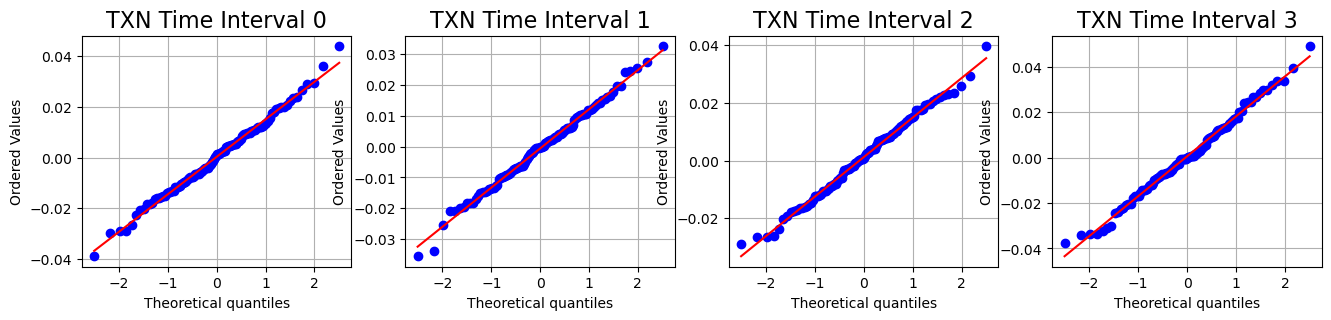

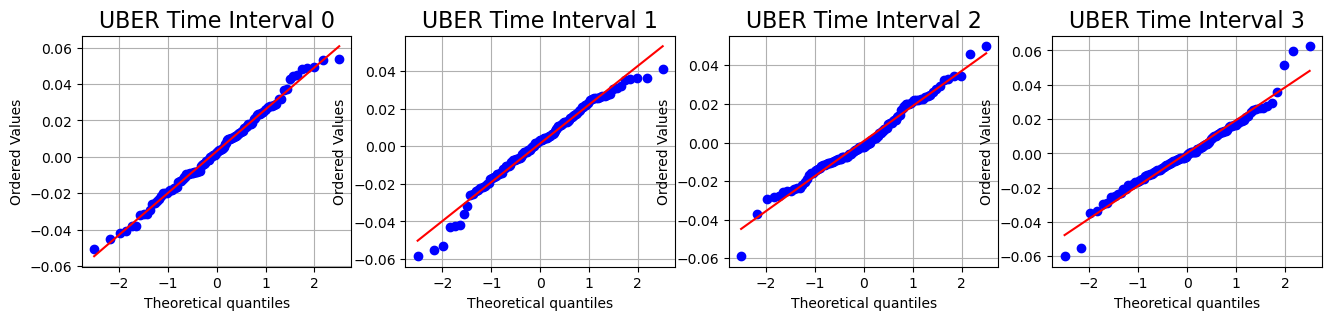

In [98]:
# Form the probability plots
for j in range(n_assets):
    # Create 1xn_cut grid of subplots
    fig, axes = plt.subplots(1, n_cut, figsize=(16, 3))
    
    for i in range(n_cut):
        stats.probplot((new_logreturns[i])[:, j], dist="norm", plot=axes[i])
        axes[i].set_title(f"{tickers[j]} Time Interval {i}", fontsize=16)
        axes[i].grid(True)

plt.show()

Based on the above plots, some of the log returns for the stocks for the selected time frames are close to normal. For each stock and time frame, we assess the evidence against normality using p-values.

In [157]:
# Collect p-values of normality tests
new_p_data = np.zeros((n_assets, n_cut))
printinfo = [["" for x in range(n_cut)] for _ in range(n_assets)]
for i in range(n_assets):
    for j in range(n_cut):
        new_p_data[i, j] = stats.normaltest((new_logreturns[j])[:, i])[1]
        # Indicate the significance/lack thereof of the p-value
        if new_p_data[i, j] < 0.05:
            (printinfo[i])[j] = "*"
        else:
            (printinfo[i])[j] = " "

# Print the p-values and interpretations
print('The p-values for each stock and time interval, without outliers, are as follows:')
print('Stock:  Time 0         1         2         3')
for i in range(n_assets):
    print(f'{tickers[i]:5}:', end = "")
    for j in range(n_cut-1):
        print(f'{new_p_data[i, j]:8.4f} {(printinfo[i])[j]}', end = "")
    print(f'{new_p_data[i, n_cut-1]:8.4f} {(printinfo[i])[n_cut-1]}')
print('An asterisk indicates there is statistically significant evidence that the data in NOT normally distributed.')
print('A value without an asterisk indicates there is no statistically significant evidence against normality.')

The p-values for each stock and time interval, without outliers, are as follows:
Stock:  Time 0         1         2         3
AMD  :  0.2453    0.0037 *  0.0443 *  0.7703  
ASML :  0.2475    0.0049 *  0.4216    0.0065 *
AVGO :  0.0000 *  0.6368    0.1378    0.0148 *
NOW  :  0.4602    0.0039 *  0.0255 *  0.0318 *
NVDA :  0.9982    0.7547    0.3638    0.5099  
PLTR :  0.0199 *  0.1259    0.0462 *  0.0011 *
QCOM :  0.1608    0.3278    0.0703    0.0605  
TSM  :  0.0815    0.1489    0.3368    0.6351  
TXN  :  0.6605    0.8556    0.8119    0.8118  
UBER :  0.8307    0.0345 *  0.5073    0.0153 *
An asterisk indicates there is statistically significant evidence that the data in NOT normally distributed.
A value without an asterisk indicates there is no statistically significant evidence against normality.


We notice that for each stock, there is at least one time frame above for which there is no statistically significant evidence against normality.

## Stocks with Weights ##

We now examine the portfolio as a whole. We determined the weights in Mini-Project 1, and we repeat them below.
- AMD: Weight = 0.1414,
- ASML: Weight = 0.0976,
- AVGO: Weight = 0.1972,
- NOW: Weight = 0.0562,
- NVDA: Weight = 0.1427,
- PLTR: Weight = 0.0558,
- QCOM: Weight = 0.0845,
- TSM: Weight = 0.0681,
- TXN: Weight = 0.1019, and
- UBER: Weight = 0.0544.

We know that the sum of normal distributions is also a normal distribution. The above analysis revealed that there is statistically significant evidence that at least some of the stocks in the portfolio do not have normally distributed log returns. We investigate the distribution of the log returns for the portfolio as a whole.

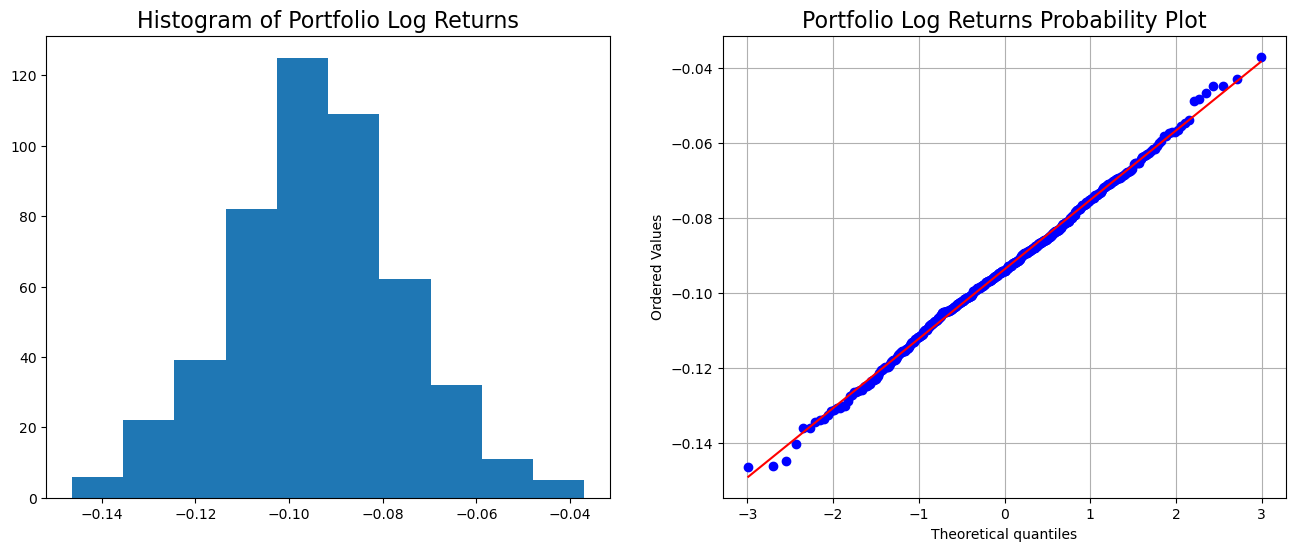

In [211]:
# Set the weights
weights = np.array([0.1414, 0.0976, 0.1972, 0.0562, 0.1427, 0.0558, 0.0845, 0.0681, 0.01019, 0.0544])

# Construct the portfolio
returns_adj = returns.dropna()
portfolio = np.dot(weights, returns_adj.T)

# Determine the log returns
log_port = np.log(portfolio)

# Remove outliers
new_log_port = log_port[(np.abs(stats.zscore(log_port)) < 3)]

# Create 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of log returns
axes[0].hist(new_log_port)
axes[0].set_title('Histogram of Portfolio Log Returns', fontsize=16)

# Probability plot
stats.probplot(new_log_port, dist="norm", plot=axes[1])
axes[1].set_title('Portfolio Log Returns Probability Plot', fontsize=16)
axes[1].grid(True)

plt.show()

The distribution of log returns of the portfolio appears approximately normal based on the histogram and the normal probability plot. We assess the evidence against normality using p-values.

In [213]:
p_val = stats.normaltest(new_log_port)[1]
print(f'The p-value is {p_val:.4f}.')
if p_val < 0.05:
    print('There is statistically significant evidence that the data is NOT normally distributed.')
else:
    print('There is no statistically significant evidence against normality.')

The p-value is 0.7970.
There is no statistically significant evidence against normality.


There is no statistically significant evidence against normality of the distribution of log returns of the portfolio. Some of the stocks in the portfolio have log return distributions for which there is evidence against normality. However, when these stocks are weighted and combined, and the outliers are removed, there is not statistically significant evidence against the normality of the log returns of the portfolio as a whole.

# <span style="color:blue;"> 3. Portfolio from Mini-Project 1: Low-Risk Profile </span> #

Our low-risk profile portfolio from Mini-Project 1 has the following stocks and weights:
- AMT: Weight = 0.0500,
- COST: Weight = 0.0754,
- DUK: Weight = 0.1644,
- JNJ: Weight = 0.1475,
- KO: Weight = 0.1662,
- RIO: Weight = 0.0662,
- RTX: Weight = 0.1205,
- SO: Weight = 0.0500,
- WMT: Weight = 0.0501, and
- XOM: Weight = 0.1097.

As we have already examined that removing outliers can dramatically affect the normality of the underlying distribution, we focus here on the time frames.

In [2]:
# Set the dates to be the past five years
start_date = dt.datetime.today()-dt.timedelta(days = 5*365)
end_date = dt.datetime.today()

# Set the tickers
tickers = ['AMT', 'COST', 'DUK', 'JNJ', 'KO', 'RIO', 'RTX', 'SO', 'WMT', 'XOM']

# Number of assets
n_assets = len(tickers)

# Download the data
stocks = yf.download(tickers, start=start_date, end=end_date)
returns = stocks['Close']/stocks['Close'].shift(1)
df = np.log(returns.dropna())
logreturns = df.values

# Number of dates for which there is stock data, after removing N/A's
n_data = np.size(df, 0)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  10 of 10 completed


In [3]:
# Construct probability plots for each time frame
def prob_plots_cut(n_data, n_cut, n_assets, df):
    # Number of dates in each time frame
    n_data_cut = int(np.floor(n_data/n_cut))
    
    # Create a list of data frames
    list_df = [df[i*n_data_cut:(i+1)*n_data_cut] for i in range(n_cut)]
    
    # Omit outliers
    new_df = [list_df[i][(np.abs(stats.zscore(list_df[i])) < 3).all(axis=1)] for i in range(n_cut)]
    new_logreturns = [new_df[i].values for i in range(n_cut)]
    
    # Form the probability plots
    for j in range(n_assets):
        # Create 1xn_cut grid of subplots, accounting for scaling
        fig, axes = plt.subplots(1, n_cut, figsize=(16, 6/(1+2*np.log(n_cut/2))))

        # Plot
        for i in range(n_cut):
            stats.probplot((new_logreturns[i])[:, j], dist="norm", plot=axes[i])
            axes[i].set_title(f"{tickers[j]} T={i}", fontsize=16)
            axes[i].grid(True)

    # Show the plots
    plt.show()

    # Return new_logreturns to be used in the computation of p-values
    return new_logreturns

# Determine p-values for each time frame and assess their significance
def p_vals_cut(n_data, n_cut, n_assets, tickers, new_logreturns):
    # Collect p-values of normality tests
    new_p_data = np.zeros((n_assets, n_cut))
    printinfo = [["" for x in range(n_cut)] for _ in range(n_assets)]
    for i in range(n_assets):
        for j in range(n_cut):
            new_p_data[i, j] = stats.normaltest((new_logreturns[j])[:, i])[1]
            # Indicate the significance/lack thereof of the p-value
            if new_p_data[i, j] < 0.05:
                (printinfo[i])[j] = "*"
            else:
                (printinfo[i])[j] = " "
    
    # Print the p-values and interpretations
    print('The p-values for each stock and time interval, without outliers, are as follows:')
    print('Stock:  Time 0', end="")
    for j in range(1, n_cut-1):
        print(f'         {j}', end="")
    print(f'         {n_cut-1}')
    for i in range(n_assets):
        print(f'{tickers[i]:5}:', end = "")
        for j in range(n_cut-1):
            print(f'{new_p_data[i, j]:8.4f} {(printinfo[i])[j]}', end = "")
        print(f'{new_p_data[i, n_cut-1]:8.4f} {(printinfo[i])[n_cut-1]}')
    print('An asterisk indicates there is statistically significant evidence that the data in NOT normally distributed.')
    print('A value without an asterisk indicates there is no statistically significant evidence against normality.')

## 2 Time Frames ##

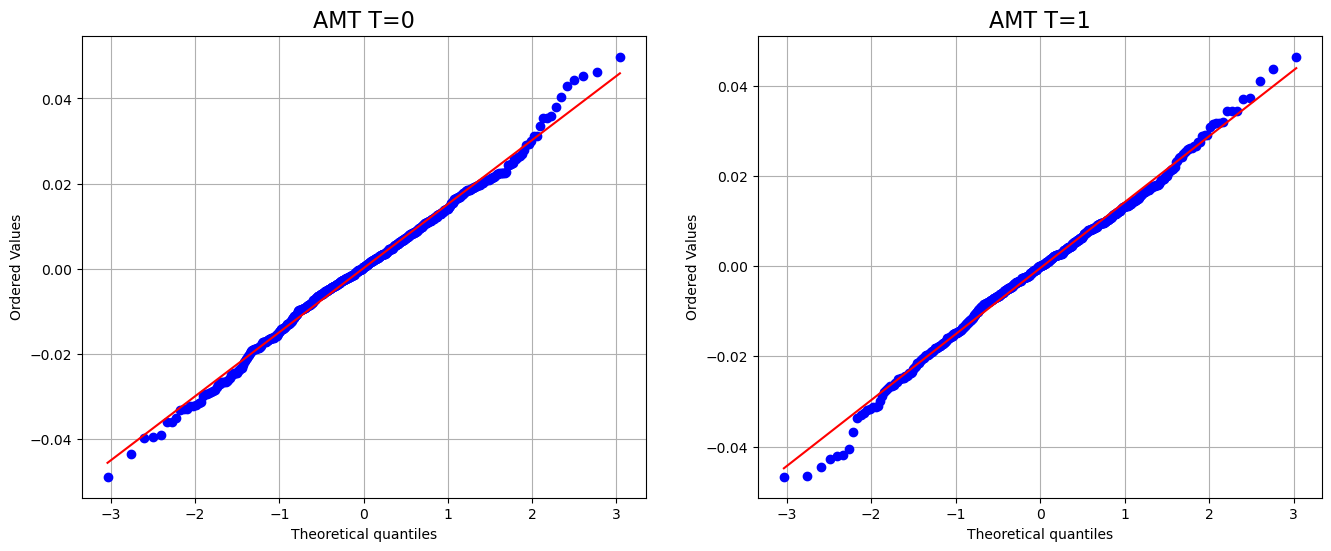

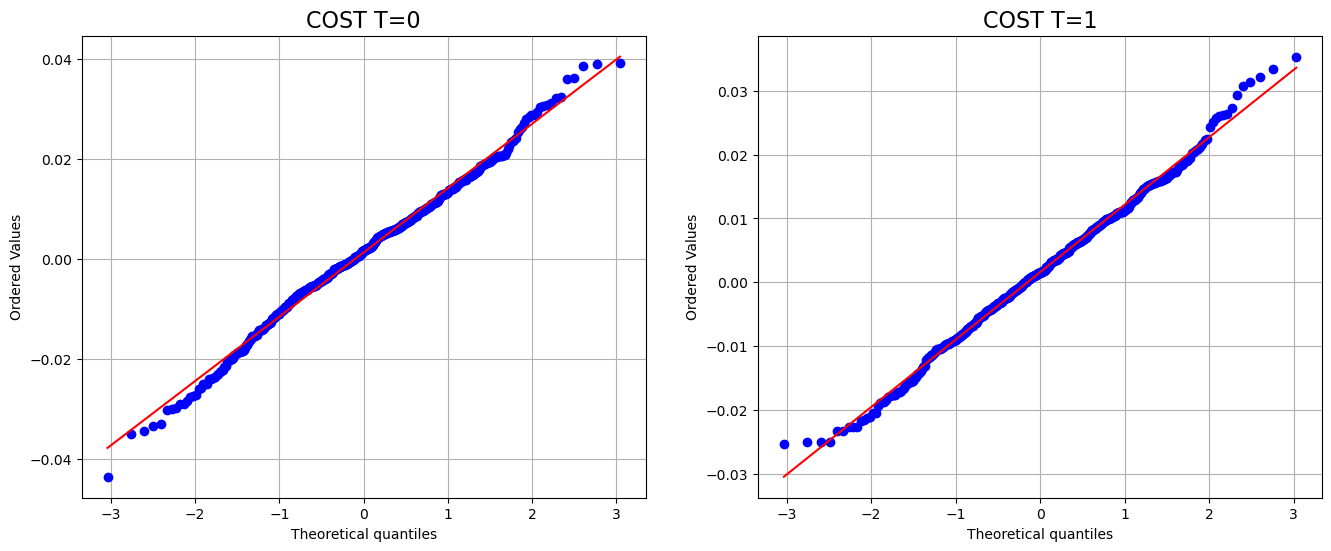

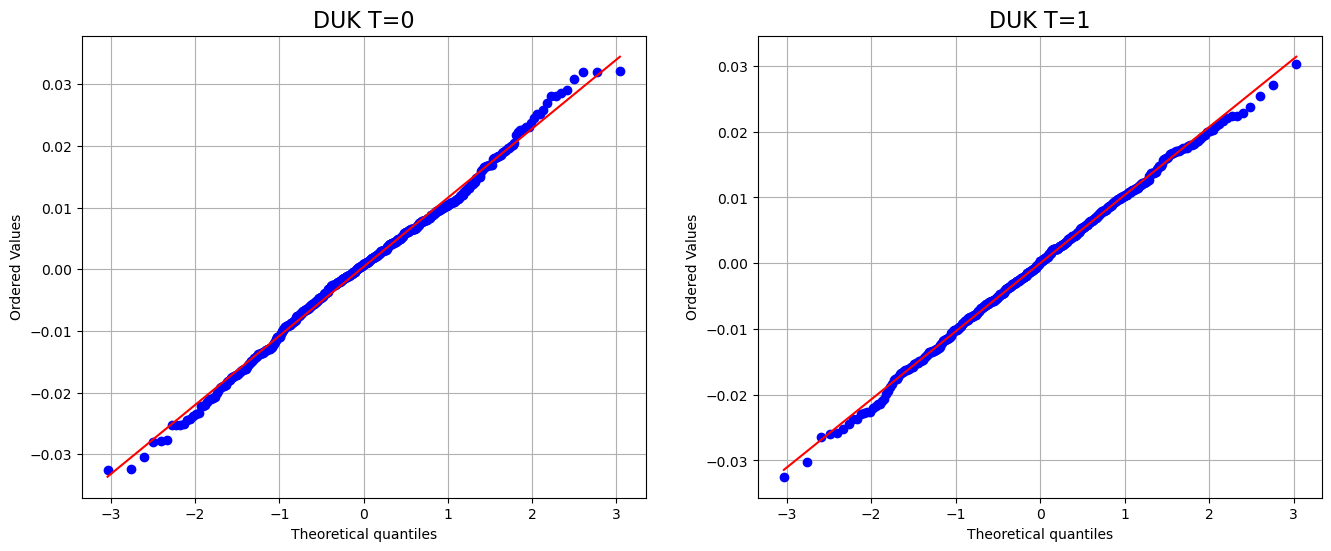

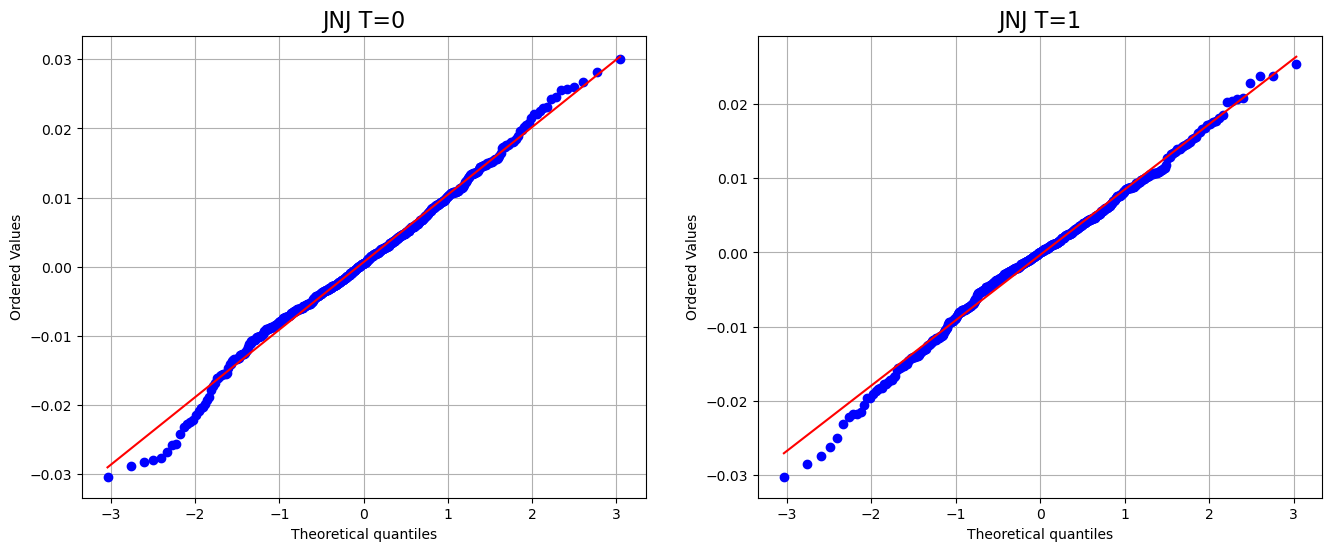

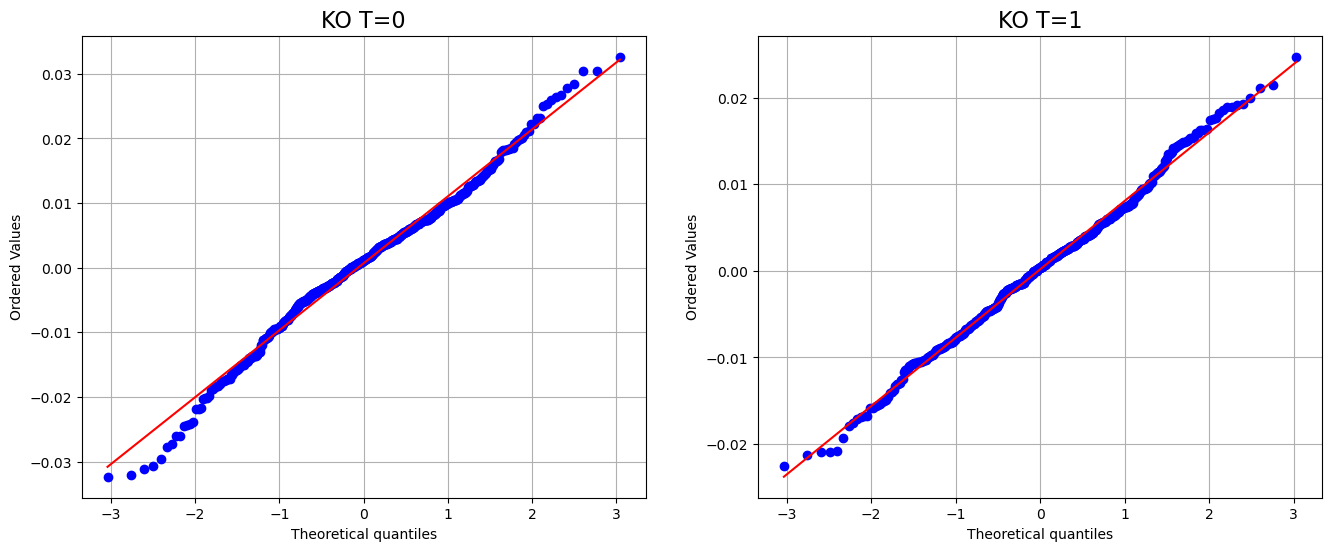

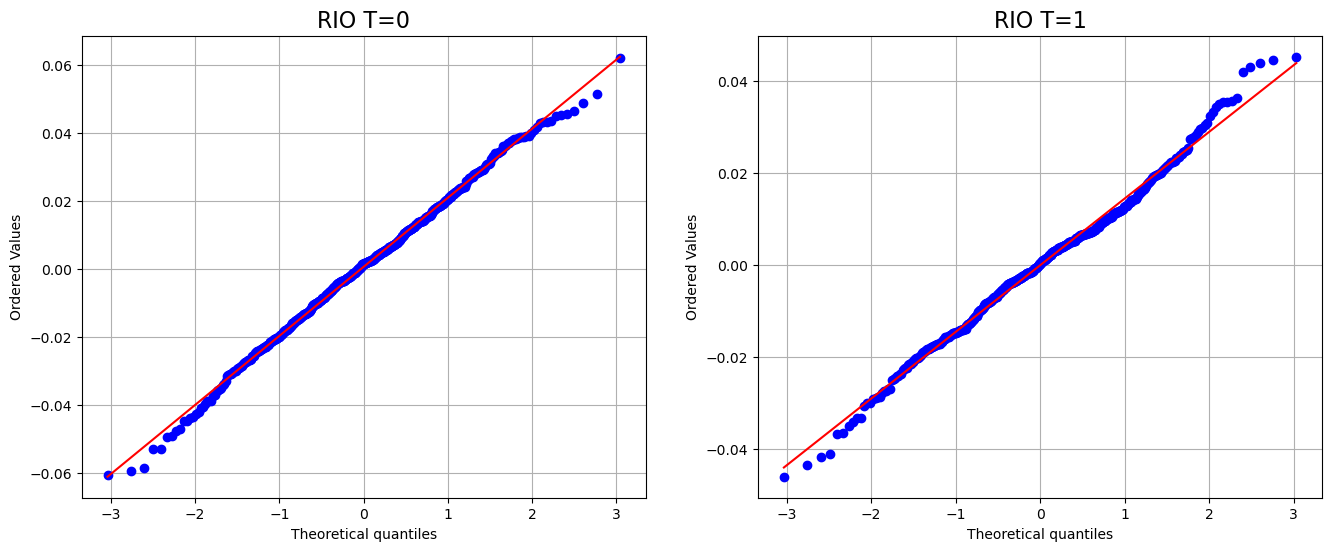

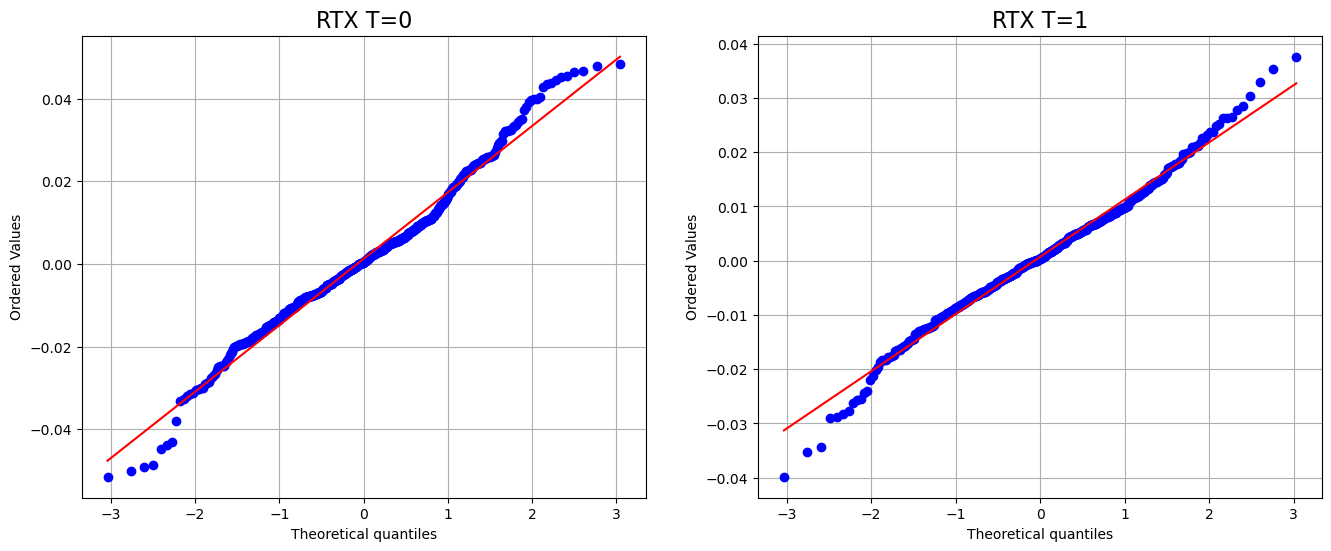

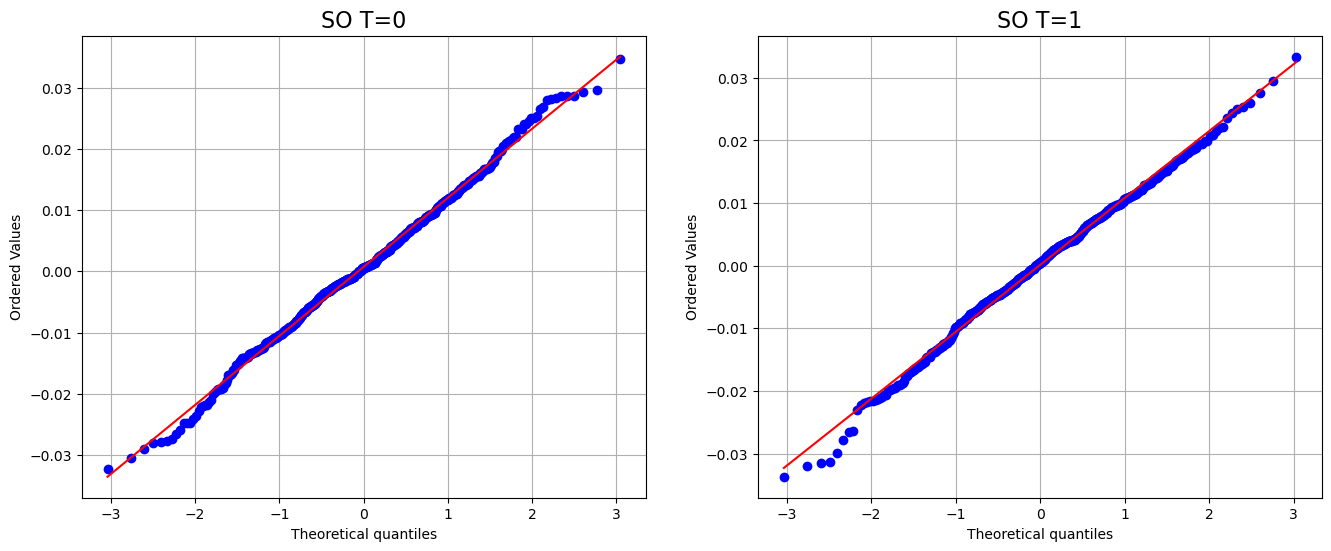

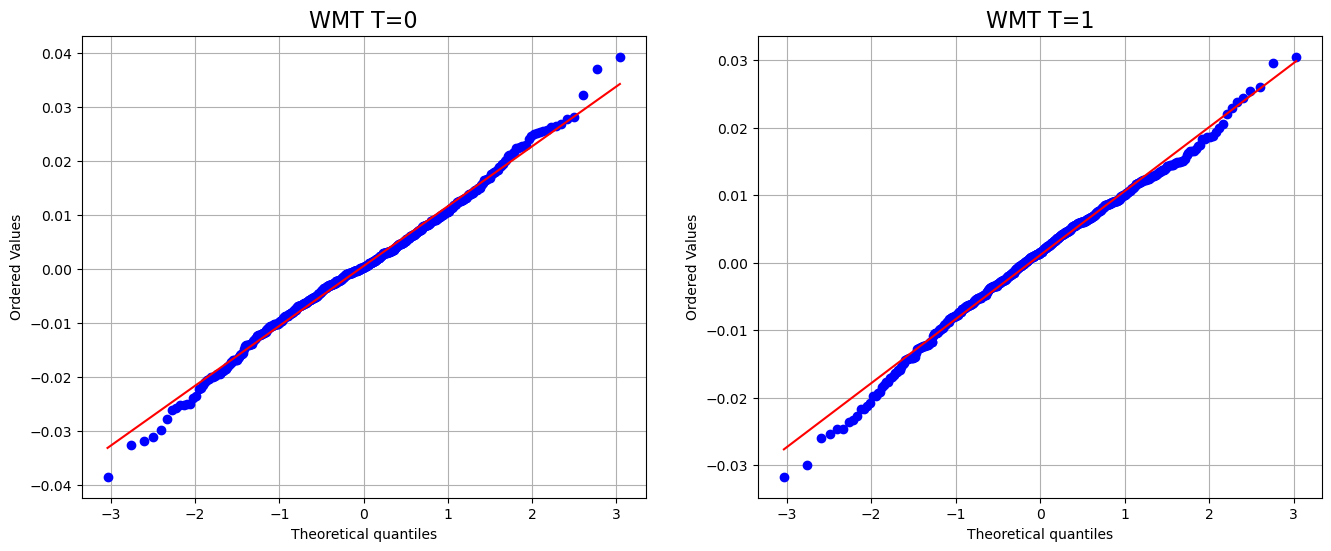

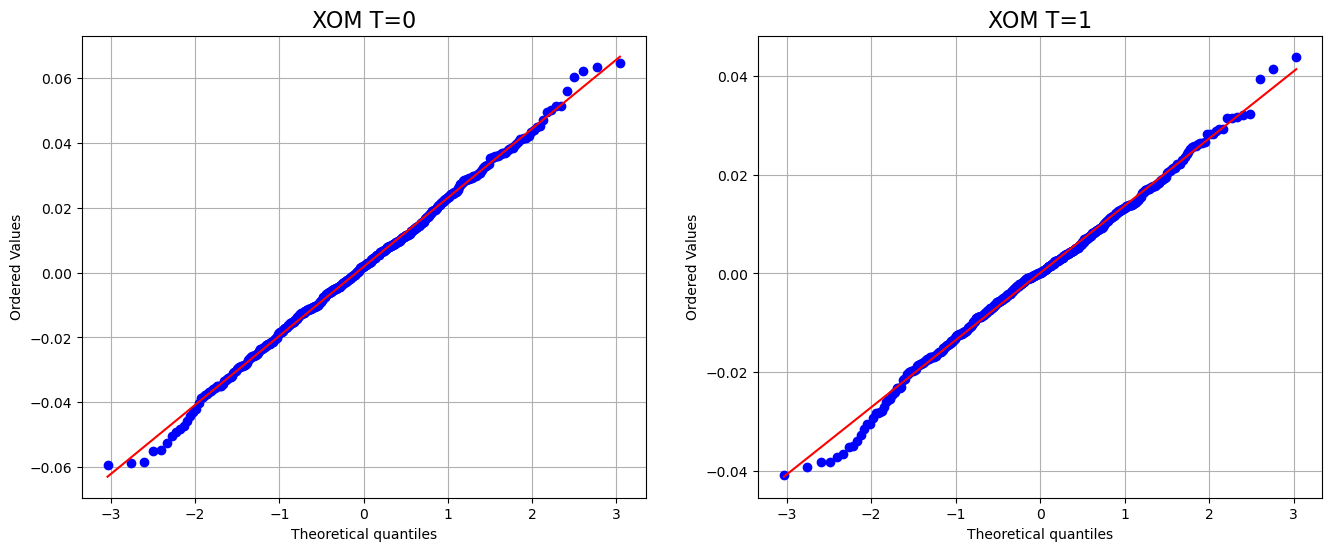

In [4]:
# Number of time frames
n_cut = 2

# Probability plots
new_logreturns = prob_plots_cut(n_data, n_cut, n_assets, df)

In [5]:
# p-values
p_vals_cut(n_data, n_cut, n_assets, tickers, new_logreturns)

The p-values for each stock and time interval, without outliers, are as follows:
Stock:  Time 0         1
AMT  :  0.1275    0.0425 *
COST :  0.0668    0.6296  
DUK  :  0.3950    0.5616  
JNJ  :  0.0477 *  0.0117 *
KO   :  0.0027 *  0.5779  
RIO  :  0.5153    0.0673  
RTX  :  0.0019 *  0.0010 *
SO   :  0.6373    0.0922  
WMT  :  0.0264 *  0.0032 *
XOM  :  0.7498    0.1521  
An asterisk indicates there is statistically significant evidence that the data in NOT normally distributed.
A value without an asterisk indicates there is no statistically significant evidence against normality.


There is statistically significant evidence that the log returns for 3 stocks&mdash;JNJ, RTX, and WNT&mdash;are not normally distributed for either of the 2 time frames. There is statistically significant evidence that the log returns for 2 stocks&mdash;AMT and KO&mdash;are not normally distributed for one of the time frames. The other 5 stocks&mdash;COST, DUK, RIO, SO, and XOM&mdash;do not have log return distributions with statistically significant evidence against normality.

## 4 Time Frames ##

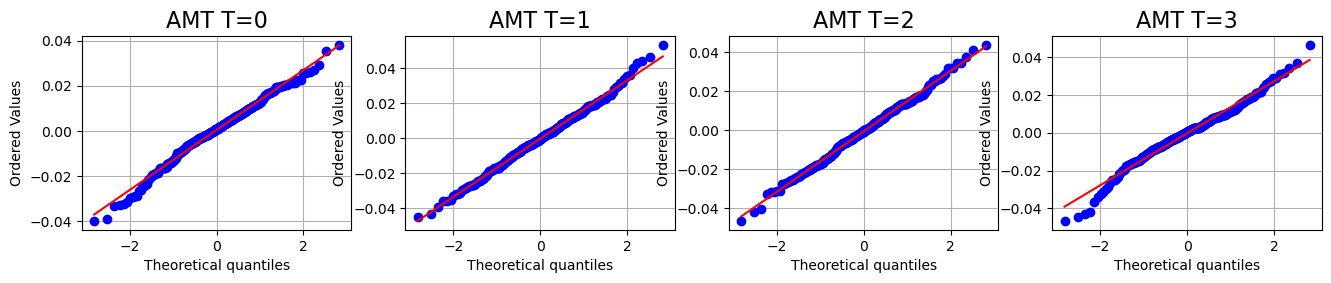

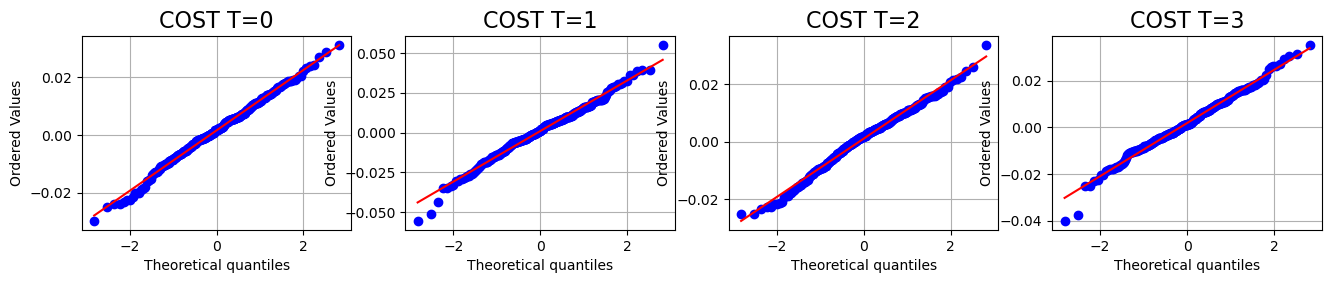

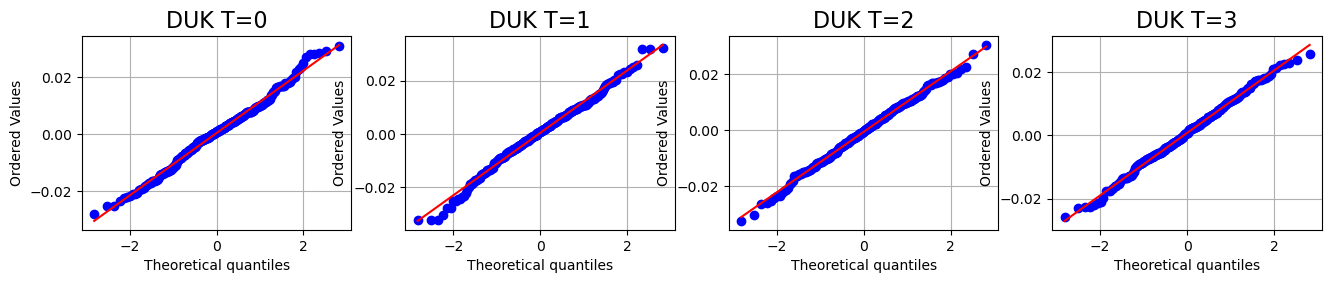

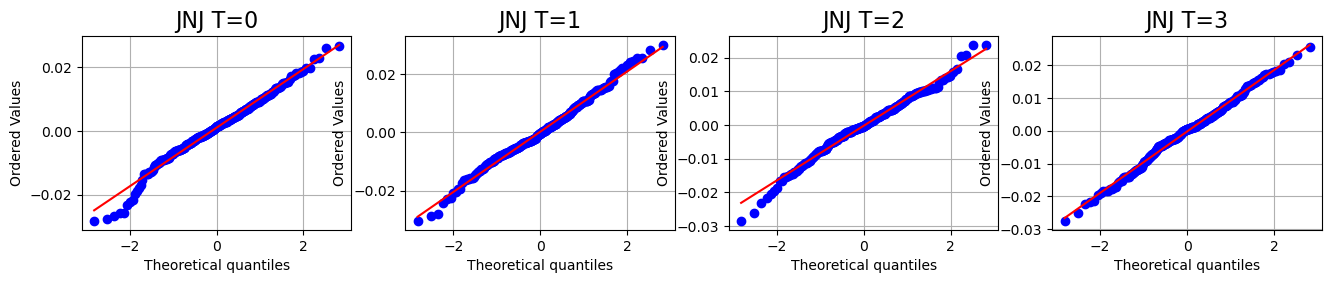

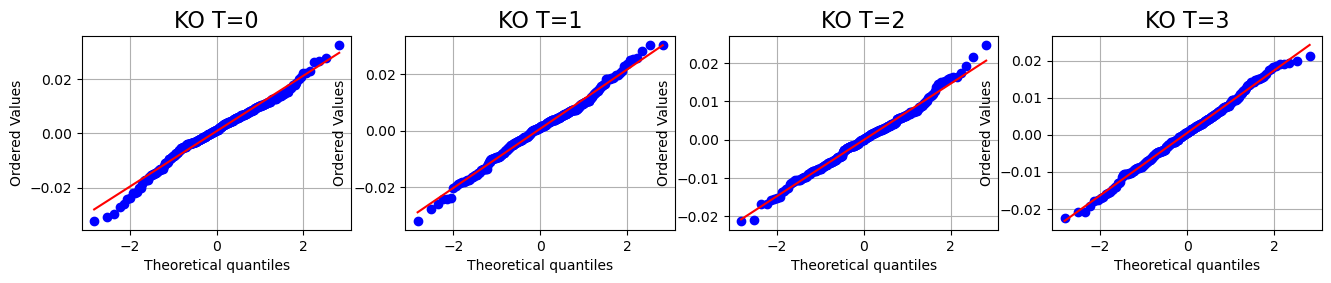

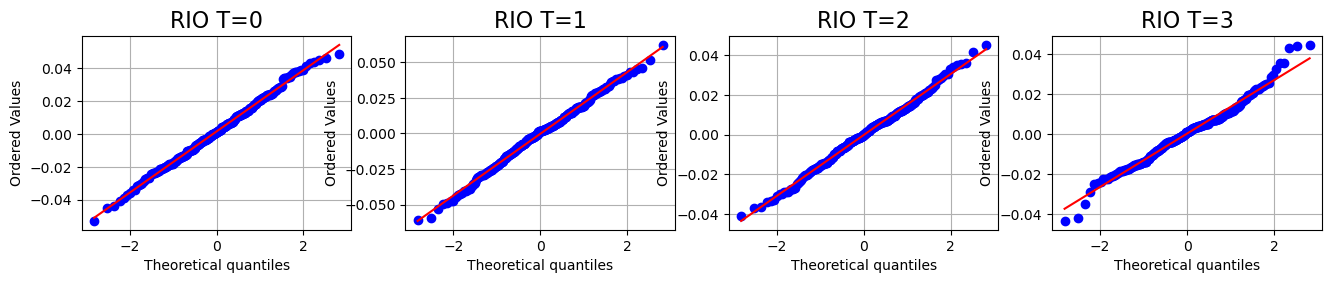

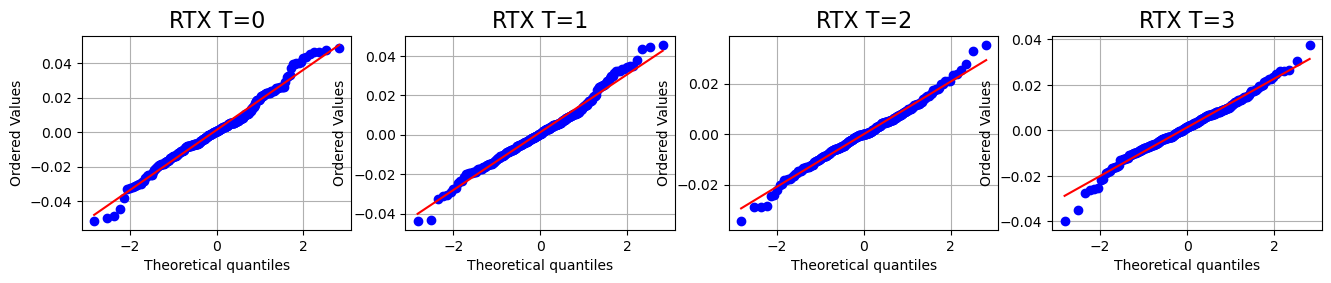

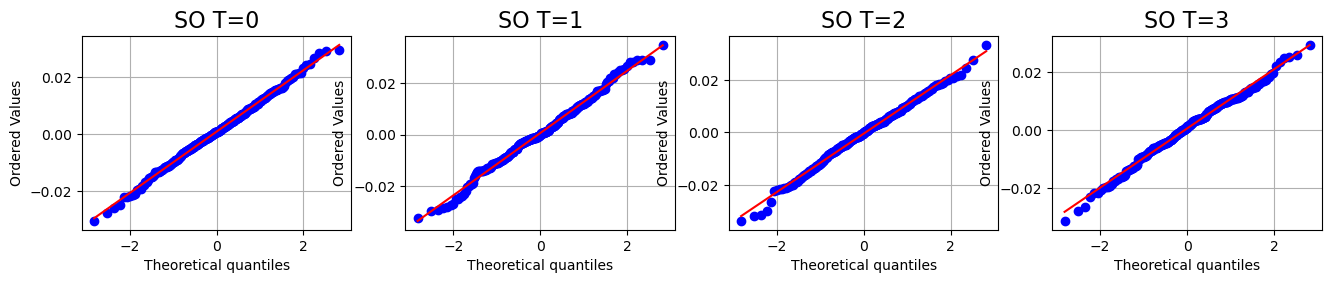

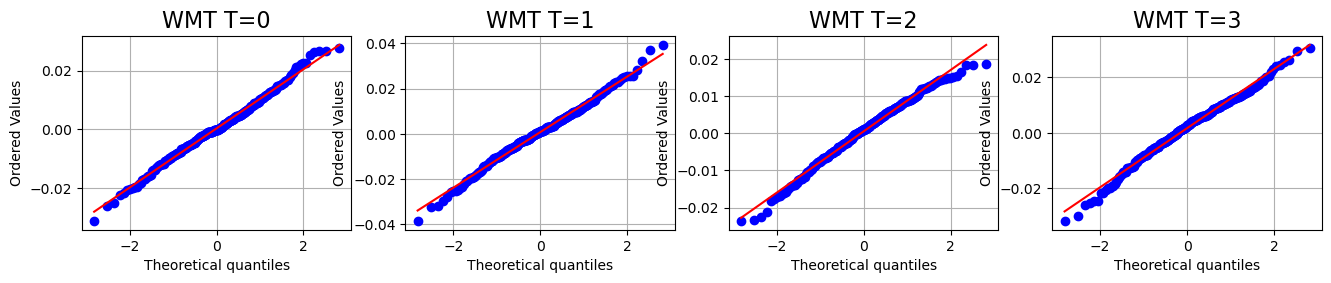

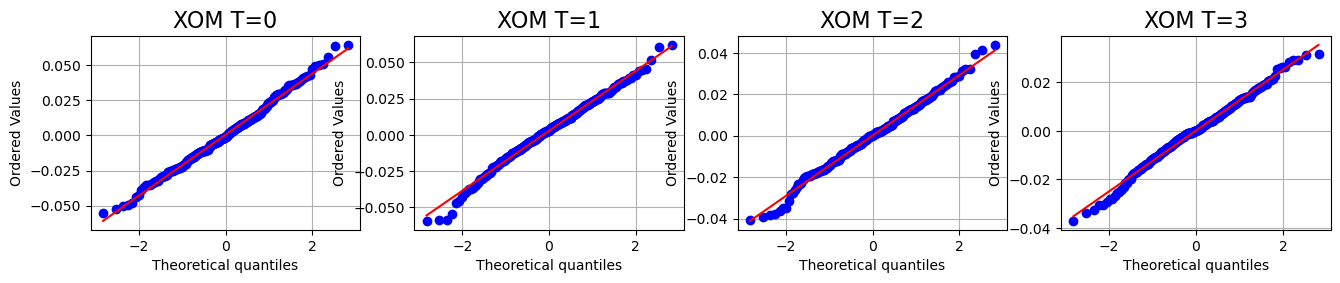

In [6]:
# Number of time frames
n_cut = 4

# Probability plots
new_logreturns = prob_plots_cut(n_data, n_cut, n_assets, df)

In [7]:
# p-values
p_vals_cut(n_data, n_cut, n_assets, tickers, new_logreturns)

The p-values for each stock and time interval, without outliers, are as follows:
Stock:  Time 0         1         2         3
AMT  :  0.0521    0.5080    0.9672    0.0022 *
COST :  0.4119    0.0252 *  0.3243    0.0692  
DUK  :  0.8417    0.1616    0.6673    0.8386  
JNJ  :  0.0037 *  0.3291    0.0109 *  0.6401  
KO   :  0.0028 *  0.2978    0.1596    0.9799  
RIO  :  0.9251    0.6094    0.8905    0.0115 *
RTX  :  0.0910    0.0185 *  0.0468 *  0.0050 *
SO   :  0.8579    0.7347    0.3091    0.2829  
WMT  :  0.3989    0.1852    0.0630    0.0435 *
XOM  :  0.3433    0.0873    0.4630    0.2401  
An asterisk indicates there is statistically significant evidence that the data in NOT normally distributed.
A value without an asterisk indicates there is no statistically significant evidence against normality.


The number of time frames has increased from 2 to 4. Unlike with only 2 time frames, no stock has log return distributions that demonstrate statistically significant evidence against normality for all time frames. One stock&mdash;RTX&mdash;has statistically significant evidence against normality for 3 time frames. There are 6 stocks&mdash;AMT, COST, JNJ, KO, RIO, and WMT&mdash;with statistically significant evidence against normality of the log return distributions for 1 or 2 time frames. Only 3 stocks&mdash;DUK, SO, and XOM&mdash;do not have statistically significant evidence for all time frames.

## 5 Time Frames ##

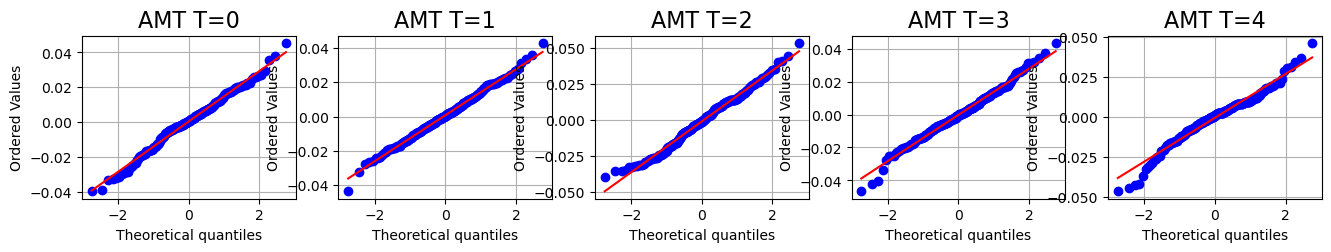

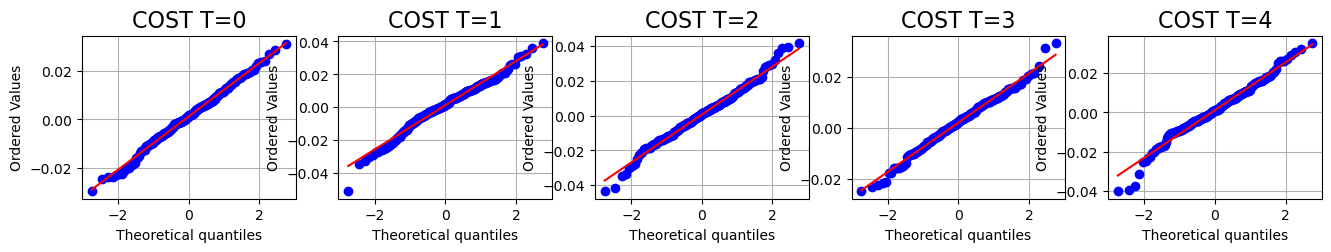

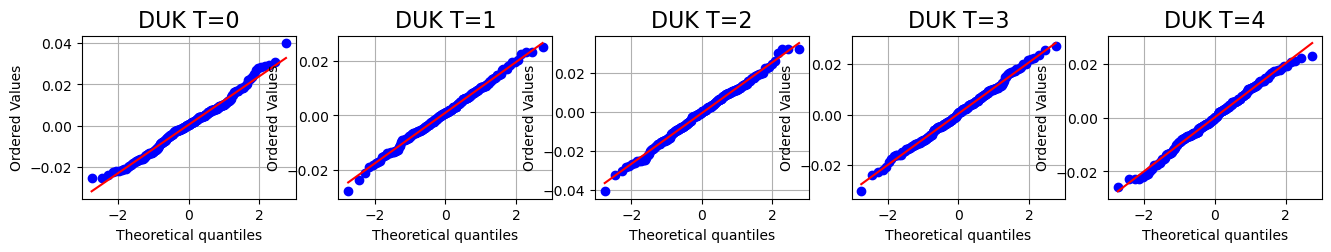

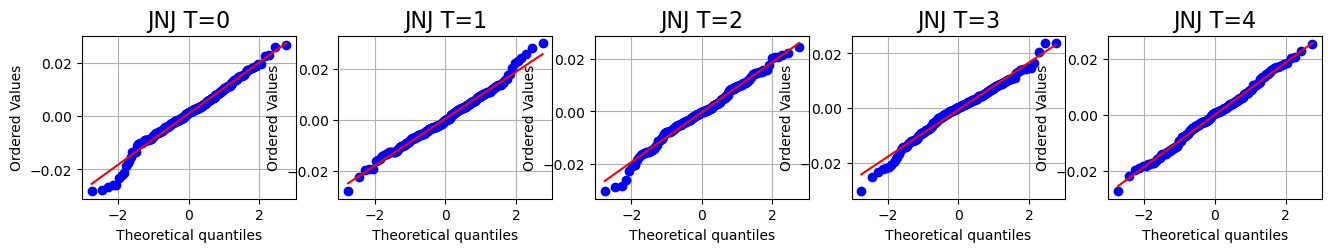

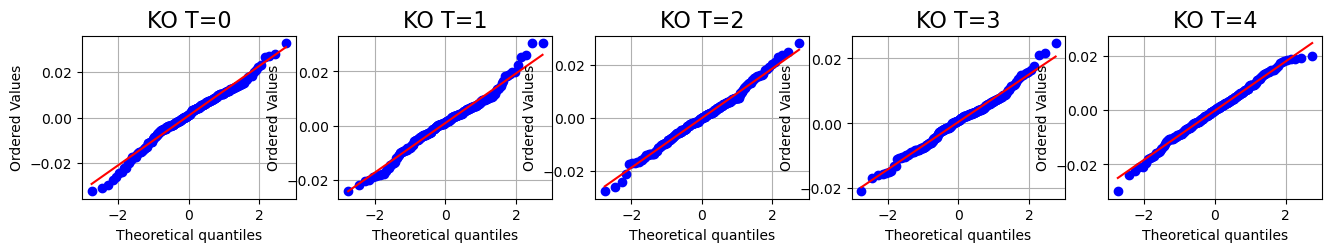

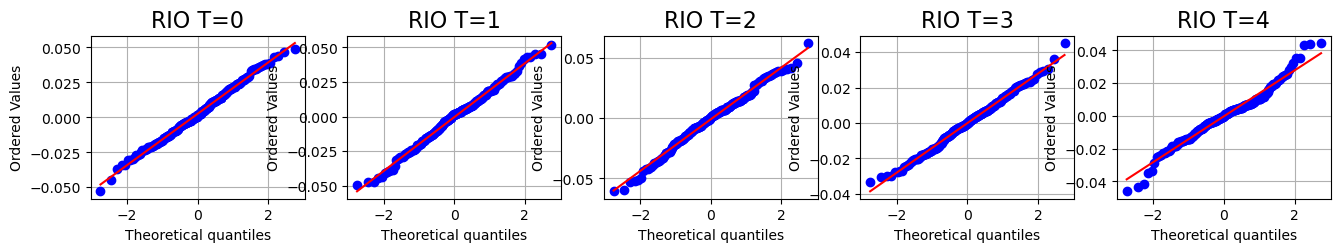

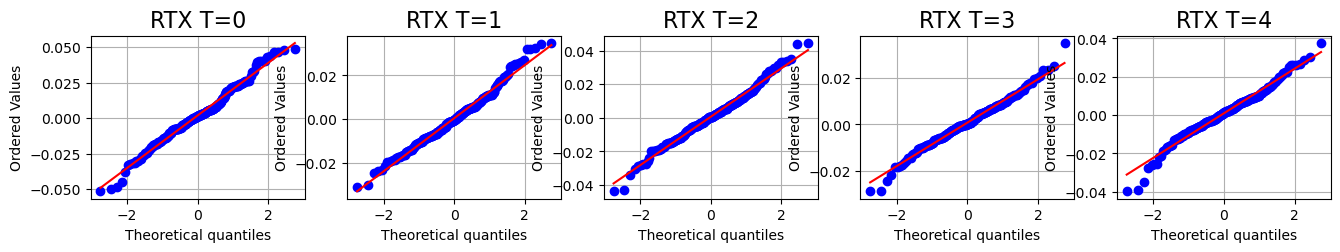

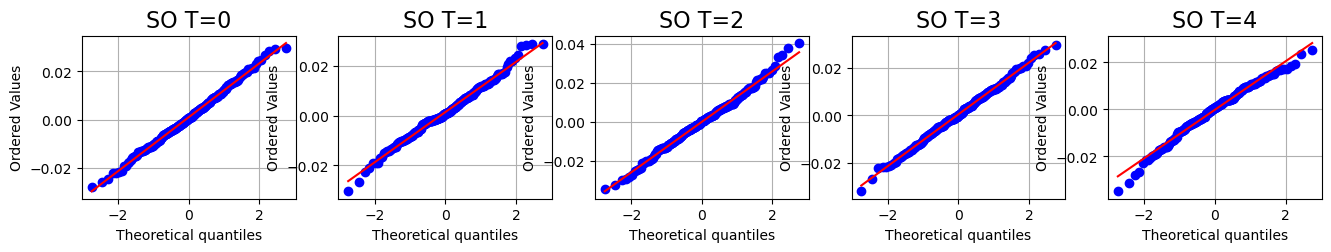

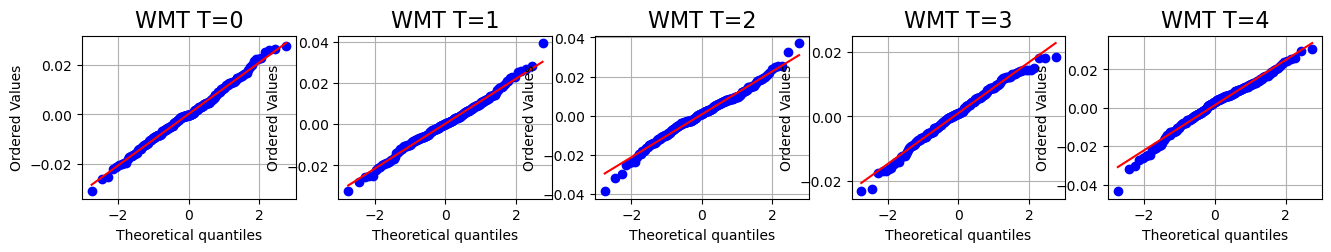

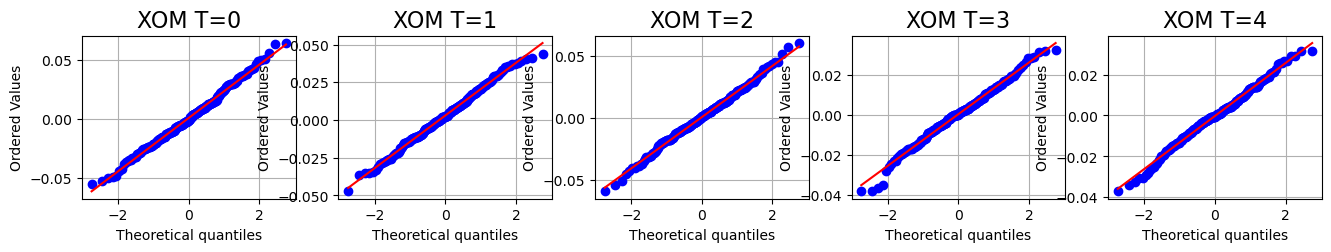

In [8]:
# Number of time frames
n_cut = 5

# Probability plots
new_logreturns = prob_plots_cut(n_data, n_cut, n_assets, df)

In [9]:
# p-values
p_vals_cut(n_data, n_cut, n_assets, tickers, new_logreturns)

The p-values for each stock and time interval, without outliers, are as follows:
Stock:  Time 0         1         2         3         4
AMT  :  0.3535    0.6609    0.5123    0.1372    0.0005 *
COST :  0.7266    0.0034 *  0.1131    0.3462    0.0088 *
DUK  :  0.2158    0.8302    0.6564    0.9582    0.4910  
JNJ  :  0.0161 *  0.0603    0.0744    0.0047 *  0.9731  
KO   :  0.0210 *  0.0783    0.3041    0.2065    0.4214  
RIO  :  0.8641    0.9274    0.3805    0.8501    0.0084 *
RTX  :  0.4318    0.0386 *  0.1107    0.0490 *  0.0058 *
SO   :  0.7840    0.3591    0.3034    0.9927    0.0152 *
WMT  :  0.7285    0.1094    0.0172 *  0.1542    0.0011 *
XOM  :  0.5074    0.8102    0.5953    0.2189    0.5621  
An asterisk indicates there is statistically significant evidence that the data in NOT normally distributed.
A value without an asterisk indicates there is no statistically significant evidence against normality.


The number of time frames has increased from 4 to 5. Most stocks have statistically significant evidence against normality for 1 or 2 of the time frames. There is 1 stock&mdash;RTX&mdash;with statistically significant evidence for 3 time frames, and there are 2 stocks&mdash;DUK and XOM&mdash;for which no time frame yields statistically significant evidence. We notice that when the total number of time frames was 2, there were 5 stocks with no significantly significant evidence against normality for any time frame. When the total was 4, there were 3 stocks. Now that the total is 5, there are only 2 stocks. Based on the above data, as the number of time frames increases, the number of stocks with no statistically significant evidence against normality for any time frame decreases.

## 8 Time Frames ##

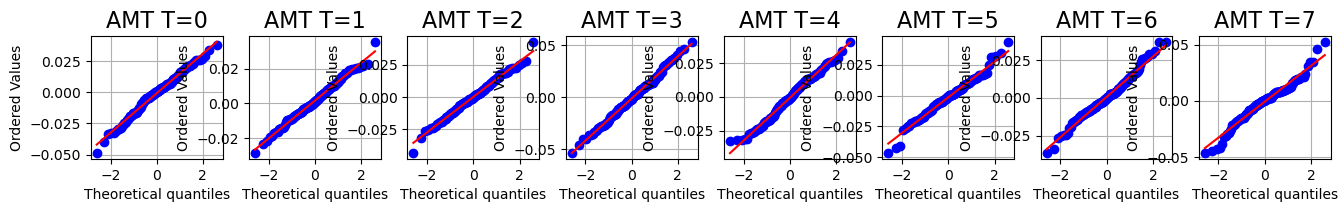

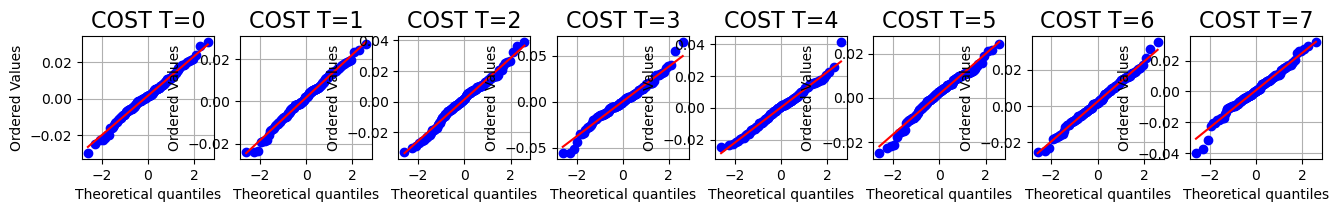

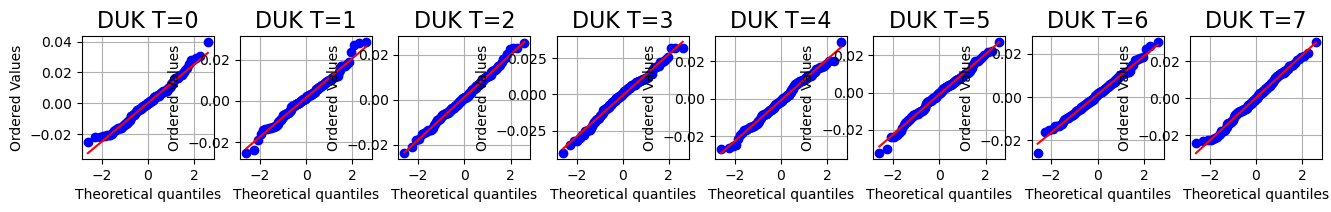

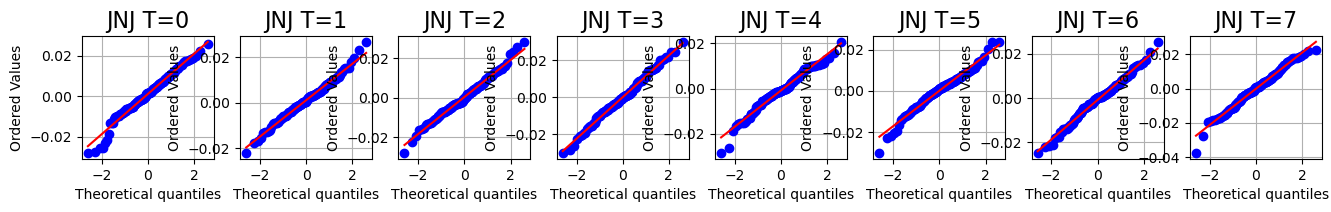

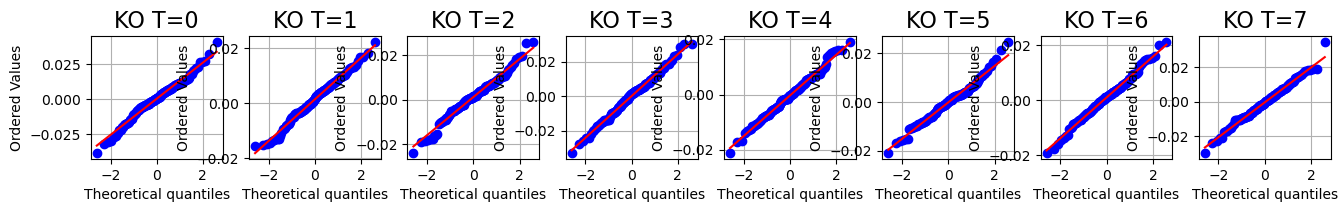

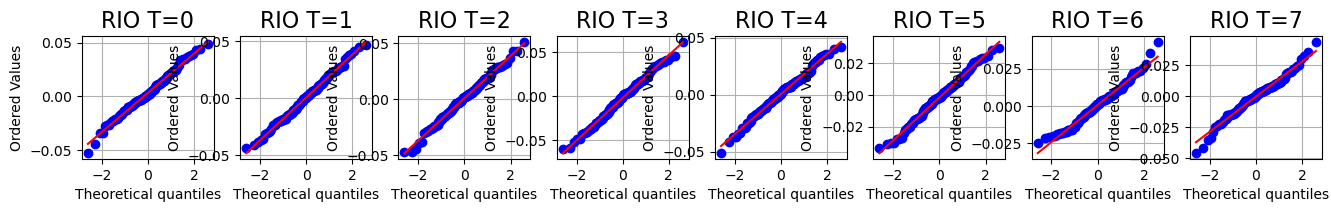

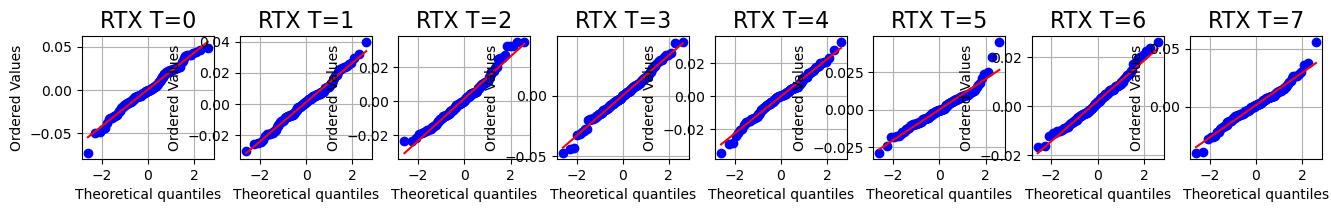

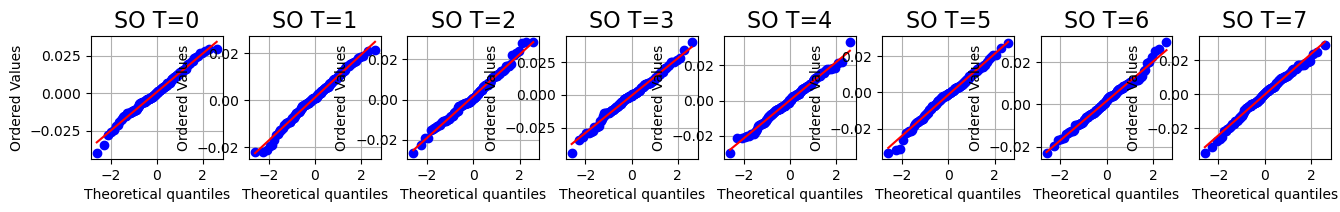

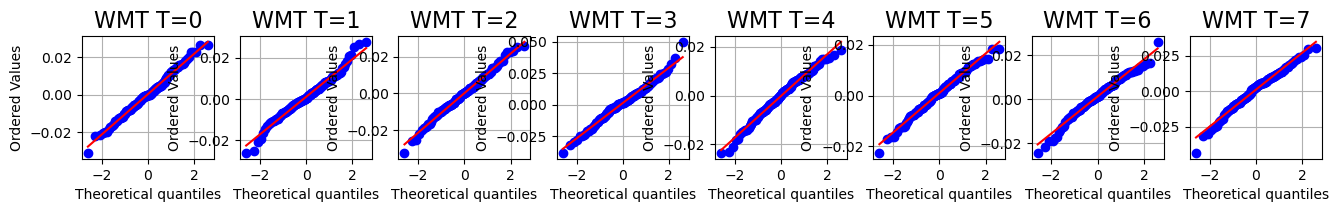

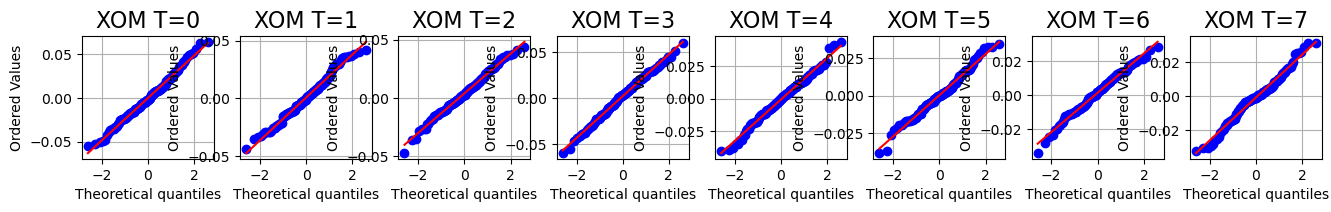

In [10]:
# Number of time frames
n_cut = 8

# Probability plots
new_logreturns = prob_plots_cut(n_data, n_cut, n_assets, df)

In [11]:
# p-values
p_vals_cut(n_data, n_cut, n_assets, tickers, new_logreturns)

The p-values for each stock and time interval, without outliers, are as follows:
Stock:  Time 0         1         2         3         4         5         6         7
AMT  :  0.3194    0.9044    0.6036    0.8698    0.1563    0.1200    0.2404    0.0279 *
COST :  0.4585    0.6456    0.5815    0.0429 *  0.2786    0.0425 *  0.7585    0.0487 *
DUK  :  0.2089    0.2914    0.9012    0.2752    0.8040    0.4700    0.6684    0.5704  
JNJ  :  0.0410 *  0.2218    0.2772    0.8814    0.0192 *  0.0152 *  0.5071    0.1835  
KO   :  0.1196    0.8710    0.1658    0.9320    0.7709    0.0945    0.6249    0.3528  
RIO  :  0.7612    0.7239    0.8548    0.6534    0.6669    0.7518    0.1607    0.0592  
RTX  :  0.2889    0.4195    0.0344 *  0.4399    0.2835    0.0000 *  0.0958    0.0078 *
SO   :  0.5523    0.5420    0.5186    0.3909    0.9665    0.2212    0.4903    0.2798  
WMT  :  0.9193    0.0924    0.6715    0.2023    0.2647    0.4386    0.0548    0.0278 *
XOM  :  0.4218    0.3580    0.9256    0.5969    0.6

There are 8 time frames. There are no stocks for which every time frame results in statistically significant evidence against normality of the log returns. There are 3 stocks&mdash;COST, JNJ, and RTX&mdash;for which 3 time frames lead to statistically significant evidence against normality. There are 5 stocks&mdash;DUK, KO, RIO, SO, and XOM&mdash;for which none of the time frames result in statistically significant evidence against normality. We notice that this is contrary to our conjecture that as the number of time frames increases, the number of stocks for which none of the time frames demonstrate statistically significant evidence against normality decreases. This is likely due to how we remove the outliers for each time frame, rather than removing the outliers from the entire 5-year period and then constructing the time frames from the resulting data.

## Analysis of Time Frames ##

We have partitioned the 5-year time period into 2, 4, 5, and 8 time frames. As the number of partitions increases, the time frames themselves get smaller. We note that if the number of partitions gets as large as the number of data points, then each distribution would consist of only a single point, making any useful analysis impossible. Thus, for the given data size `n_data`, we restrict ourselves to a number of partitions `n_cut` such that `n_cut << n_data`.

We omit outliers after partitioning the 5-year time period into the time frames. We omit the outliers in this manner since our above analyses in parts 1 and 2 suggest that removing outliers for the *data being analyzed* is important to examine the characteristics of the overall distribution, without allowing the outliers to skew the analysis. As we are analyzing the data with respect to the time frames, we determine the outliers with respect to the time frames.

When partitioning the data into 2 time frames, some of the stocks do not have any time frames for which the associated distribution of the log returns is approximately normally distributed. When partitioning the data into 4, 5, or 8 time frames, there are time frames for each stock for which the distribution of the log returns is approximately normally distributed.